In [70]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [71]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [72]:
#Start with spring and work our way down to winter
season = 1
season_year = 2010
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2010-03-01 to 2010-05-31
Columns: 257 entries, 10000009 to 9000015
dtypes: float64(257)
memory usage: 185.4 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-03-01  1.687257  0.869562  1.824633  1.327326  1.631088  1.634663   
2010-03-02  1.580397  0.951522  1.566603  1.067975  1.380758  1.404955   
2010-03-03  1.287833  0.995538  1.366431  0.916646  1.170322  1.211854   
2010-03-04  1.132251  1.017608  1.223413  0.813307  1.057483  1.108310   
2010-03-05  1.039937  1.023318  1.107960  0.728225  0.973776  1.031499   
...              ...       ...       ...       ...       ...       ...   
2010-05-27  0.578161  0.509598  0.584197  0.344827  0.566860  0.658104   
2010-05-28  0.585546  0.499581  0.574102  0.367346  0.566341  0.657628   
2010-05-29  0.619732  0.491659  0.573134  0.380544  0.598235  0.686895   
2010-05-30  0.630118  0.503548  0.607128  0.420916  0.609824  0.697529   
2010-05-31  0.883613  0.514827  0.643667  0.480508  0.736304  0.813590   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-03-01  1.208451  1.179394  

          2010-03-01  2010-03-02  2010-03-03  2010-03-04  2010-03-05  \
10000009   -0.141951   -0.124007   -0.122940   -0.112721   -0.100852   
11000011   -0.205545   -0.173271   -0.145915   -0.121760   -0.102175   
11000016   -0.131267   -0.125087   -0.116763   -0.105534   -0.095436   
13000011   -0.169944   -0.164149   -0.152116   -0.137869   -0.125672   
13000019   -0.146319   -0.139646   -0.132177   -0.118616   -0.106120   
...              ...         ...         ...         ...         ...   
67000019   -0.079331   -0.026892    0.010518    0.030012    0.052615   
7000003    -0.135952   -0.107640   -0.098232   -0.090228   -0.083226   
8000001    -0.124664   -0.104110   -0.095947   -0.087711   -0.080299   
9000001    -0.134593   -0.102422   -0.071384   -0.049035   -0.022171   
9000015    -0.140040   -0.108406   -0.077979   -0.055626   -0.029428   

          2010-03-06  2010-03-07  2010-03-08  2010-03-09  2010-03-10  ...  \
10000009   -0.090828   -0.088452   -0.080955   -0.075058  

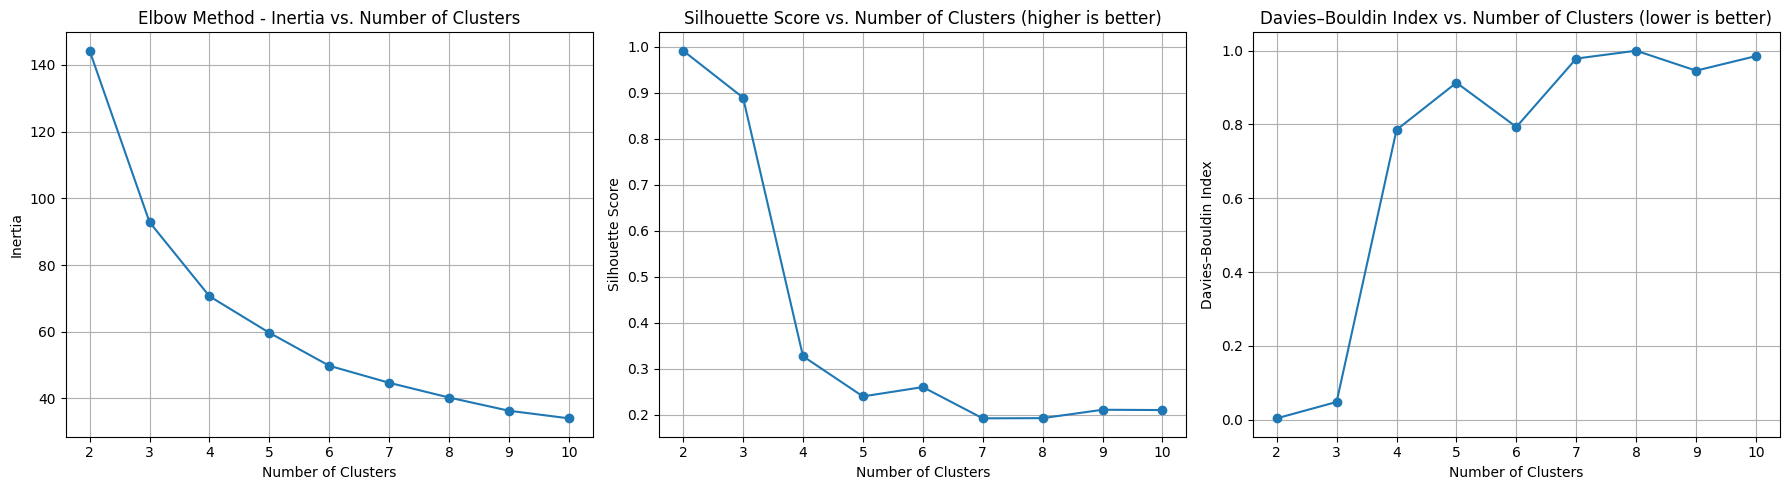

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-03-01  1.687257  0.869562  1.824633  1.327326  1.631088  1.634663   
2010-03-02  1.580397  0.951522  1.566603  1.067975  1.380758  1.404955   
2010-03-03  1.287833  0.995538  1.366431  0.916646  1.170322  1.211854   
2010-03-04  1.132251  1.017608  1.223413  0.813307  1.057483  1.108310   
2010-03-05  1.039937  1.023318  1.107960  0.728225  0.973776  1.031499   
...              ...       ...       ...       ...       ...       ...   
2010-05-27  0.578161  0.509598  0.584197  0.344827  0.566860  0.658104   
2010-05-28  0.585546  0.499581  0.574102  0.367346  0.566341  0.657628   
2010-05-29  0.619732  0.491659  0.573134  0.380544  0.598235  0.686895   
2010-05-30  0.630118  0.503548  0.607128  0.420916  0.609824  0.697529   
2010-05-31  0.883613  0.514827  0.643667  0.480508  0.736304  0.813590   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-03-01  1.208451  1.179394  

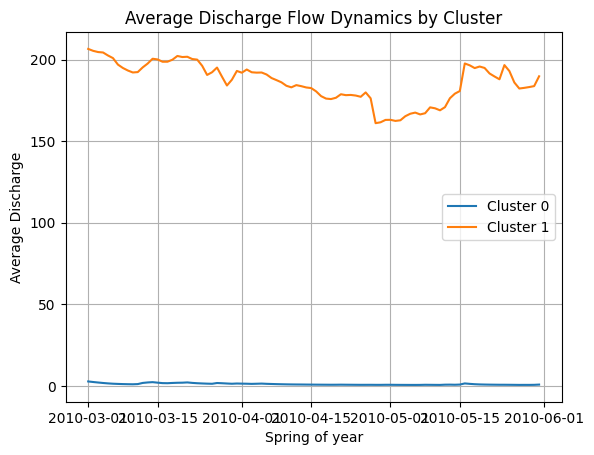

In [74]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [76]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2010-03-01  1.687257  0.869562  1.824633  1.327326  1.631088  1.634663   
2010-03-02  1.580397  0.951522  1.566603  1.067975  1.380758  1.404955   
2010-03-03  1.287833  0.995538  1.366431  0.916646  1.170322  1.211854   
2010-03-04  1.132251  1.017608  1.223413  0.813307  1.057483  1.108310   
2010-03-05  1.039937  1.023318  1.107960  0.728225  0.973776  1.031499   
...              ...       ...       ...       ...       ...       ...   
2010-05-27  0.578161  0.509598  0.584197  0.344827  0.566860  0.658104   
2010-05-28  0.585546  0.499581  0.574102  0.367346  0.566341  0.657628   
2010-05-29  0.619732  0.491659  0.573134  0.380544  0.598235  0.686895   
2010-05-30  0.630118  0.503548  0.607128  0.420916  0.609824  0.697529   
2010-05-31  0.883613  0.514827  0.643667  0.480508  0.736304  0.813590   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-03-01  1.208451  1.179394  1.324820  1.852365  ...  7.292011  5.760186   
2010-03-02  1.164435  1.111713  1.178746  1.822171  ...  8.068211  6.211818   
2010-03-03  1.063742  0.993037  0.969602  1.610214  ...  7.264574  5.977437   
2010-03-04  1.009751  0.938047  0.875755  1.444043  ...  6.122724  5.188303   
2010-03-05  0.951104  0.878989  0.798413  1.247649  ...  5.024478  4.119670   
...              ...       ...       ...       ...  ...       ...       ...   
2010-05-27  0.615818  0.722646  0.536886  0.510045  ...  0.485627  0.300668   
2010-05-28  0.633887  0.738693  0.541315  0.479762  ...  0.460097  0.285564   
2010-05-29  0.663148  0.764681  0.560991  0.492478  ...  0.409838  0.260671   
2010-05-30  0.699084  0.796598  0.615134  0.484782  ...  0.376282  0.254272   
2010-05-31  1.221058  1.260185  0.874050  1.161852  ...  0.401077  0.312961   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2010-03-01  7.429707  1.528028  7.532033  2.492424  1.764396  1.909531   
2010-03-02  4.992428  1.727708  5.596382  2.820086  1.789324  1.834385   
2010-03-03  3.855258  1.828662  4.093838  2.985747  1.602177  1.631254   
2010-03-04  3.107933  1.802339  2.952823  2.942552  1.417533  1.449457   
2010-03-05  2.482192  1.817437  2.212641  2.967327  1.261300  1.298064   
...              ...       ...       ...       ...       ...       ...   
2010-05-27  0.168332  0.191713  0.192070  0.315652  0.330611  0.454682   
2010-05-28  0.162936  0.183155  0.184875  0.309978  0.337558  0.462865   
2010-05-29  0.158345  0.187318  0.175230  0.324610  0.341015  0.472120   
2010-05-30  0.151572  0.188246  0.165414  0.277911  0.336678  0.473964   
2010-05-31  0.428413  0.311455  0.355470  0.636867  0.367780  0.606750   

             9000001   9000015  
2010-03-01  1.781869  1.711836  
2010-03-02  1.855930  1.779546  
2010-03-03  1.943761  1.859846  
2010-03-04  1.939987  1.856396  
2010-03-05  2.028094  1.936948  
...              ...       ...  
2010-05-27  1.004026  1.000690  
2010-05-28  0.992009  0.989703  
2010-05-29  1.020756  1.015985  
2010-05-30  1.041290  1.034758  
2010-05-31  1.094689  1.083579  

[92 rows x 257 columns]

<Axes: >

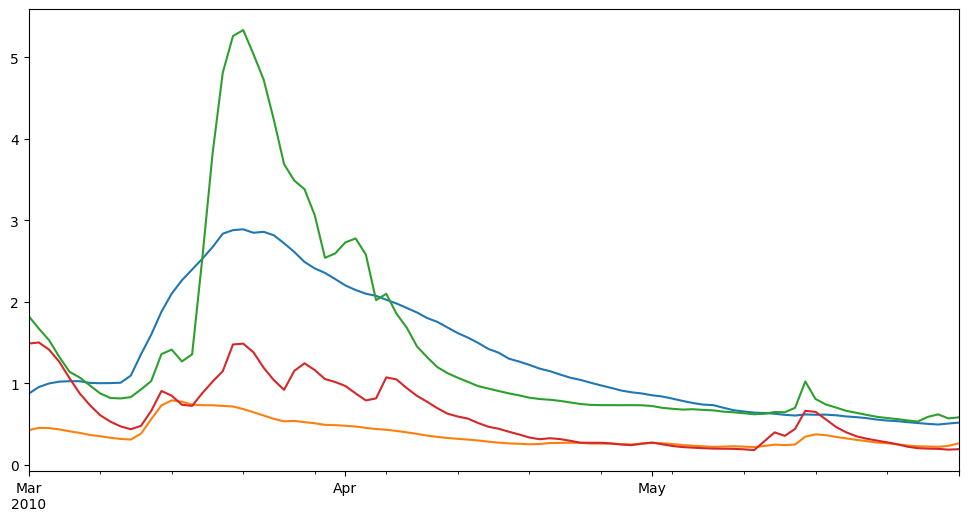

In [77]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

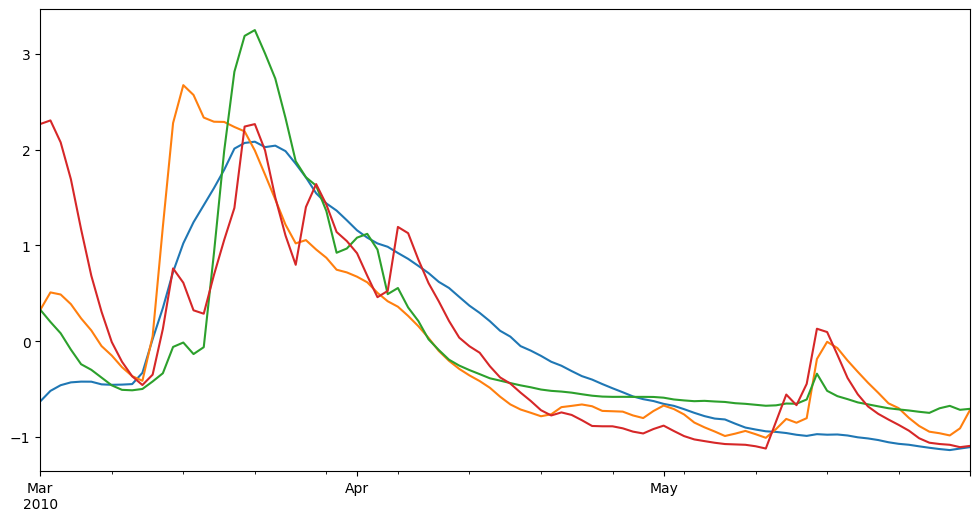

In [78]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

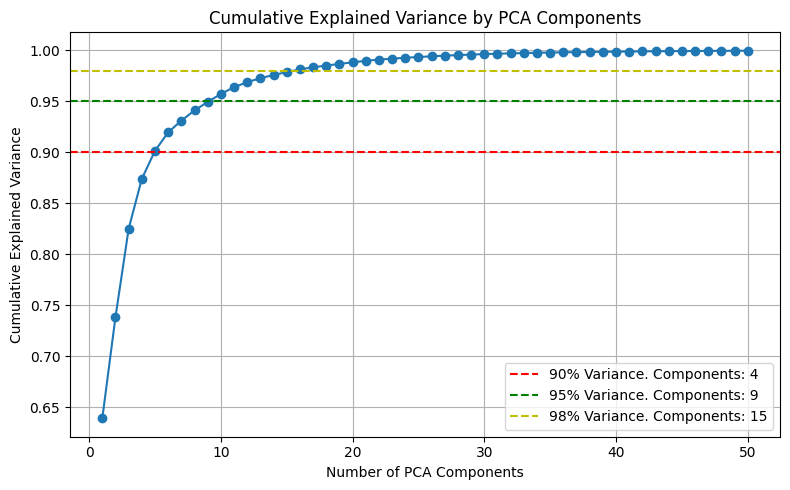

In [79]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 3.91802276e+01,  2.10811448e+01, -2.97183568e+00, ...,
         7.76302185e-01,  1.64172401e-01,  5.14476074e-01],
       [ 3.12559853e+01,  1.75359710e+01, -3.94619966e+00, ...,
        -1.17993120e+00,  3.62767219e-01, -7.27651193e-01],
       [ 2.34222328e+01,  1.38722306e+01, -4.10764077e+00, ...,
        -4.20996671e-01, -1.56932346e-01,  5.44488614e-01],
       ...,
       [-1.31388542e+01,  1.01528095e+00,  1.09846189e+00, ...,
         5.37251679e-01, -2.69674716e-01,  5.12934460e-03],
       [-1.21307953e+01,  9.68428781e-01,  1.60182929e+00, ...,
         2.28320076e-01, -1.52745046e-01,  2.22537449e-01],
       [-8.36222909e+00,  9.83717074e-01,  1.17229160e+00, ...,
        -9.73420030e-01,  5.79035259e-01, -5.96929514e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


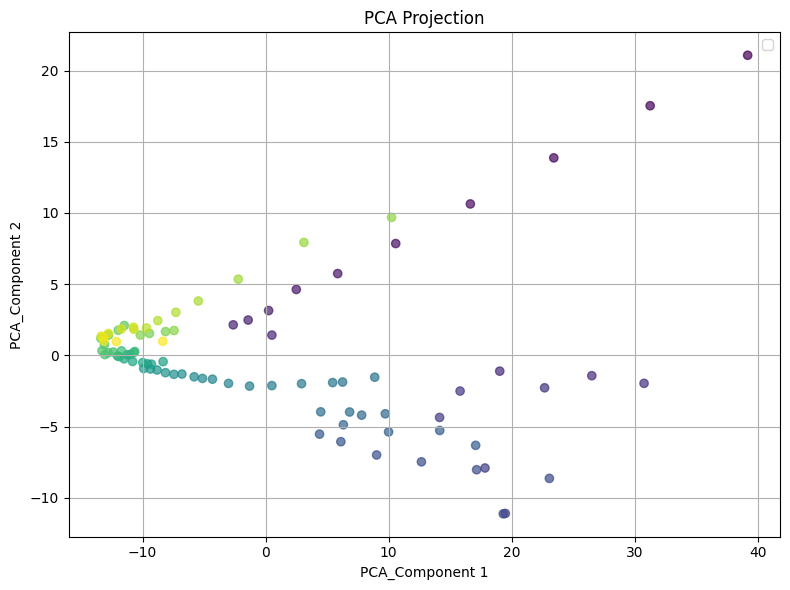

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


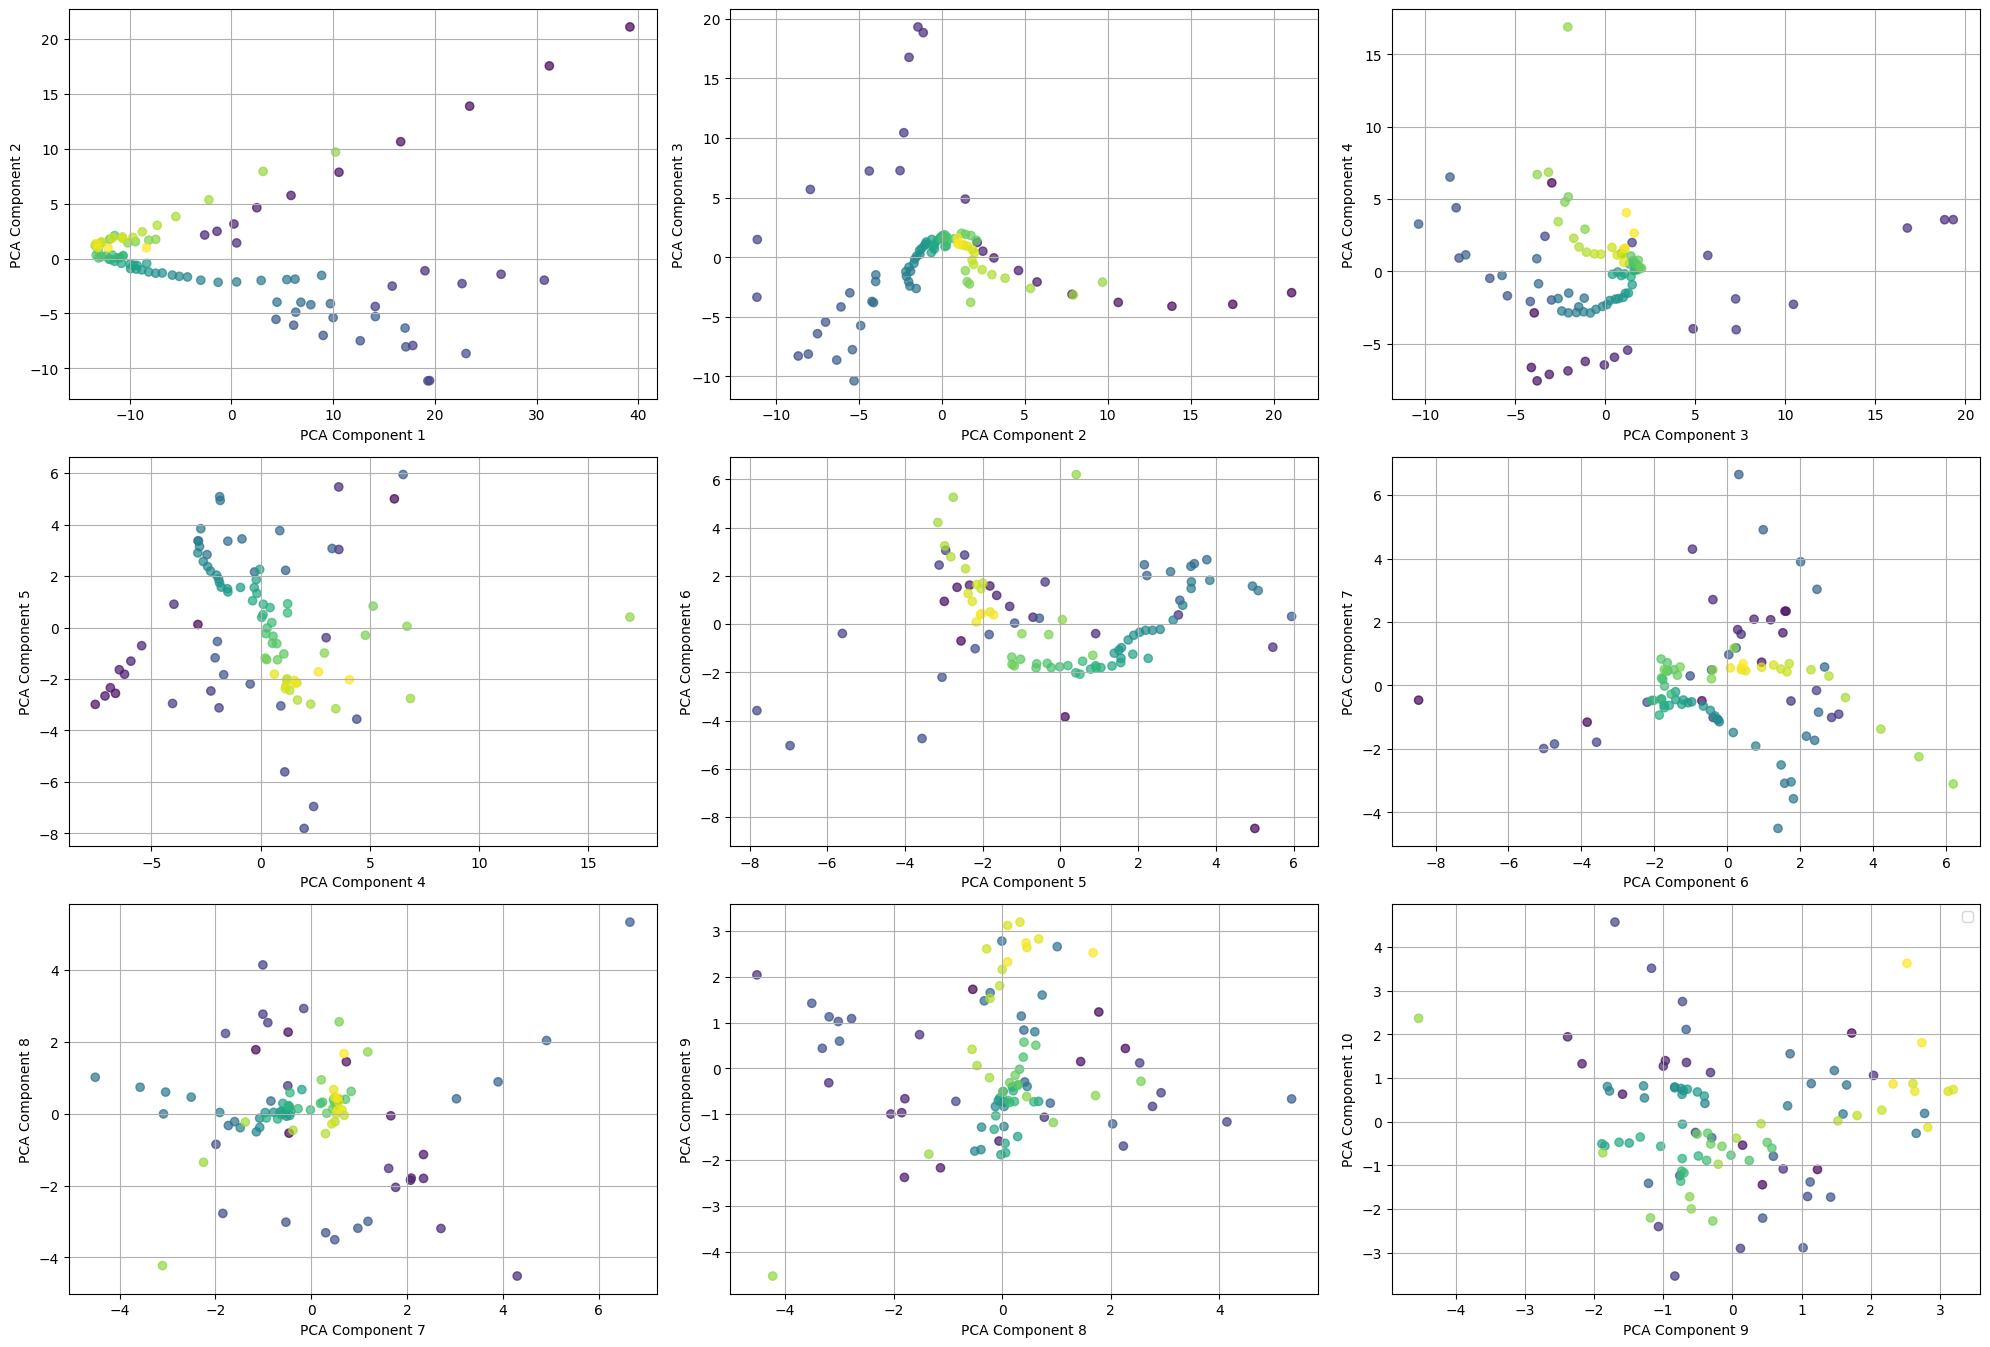

In [82]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [83]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.437
KMeans Davies-Bouldin Index is 1.134


<Axes: xlabel='k'>

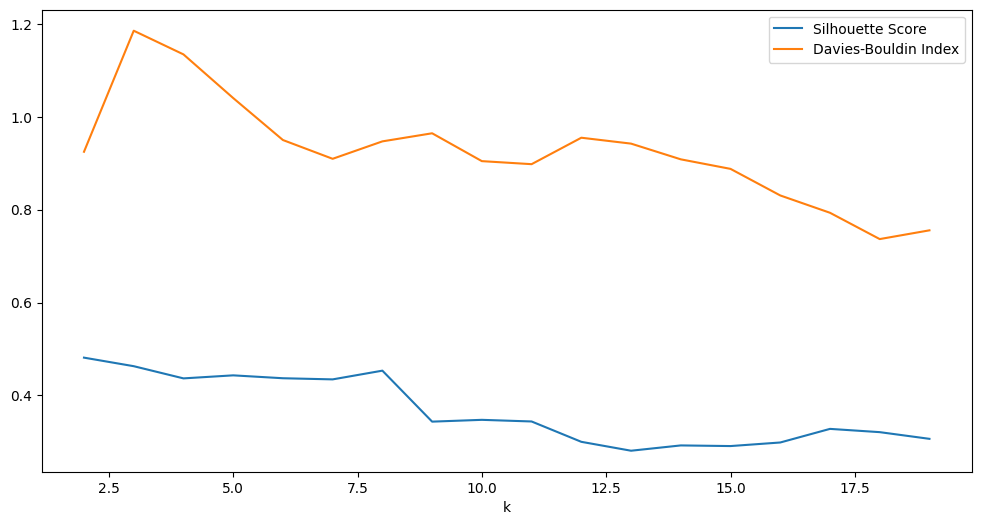

In [84]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         2     83         -0.239749   
3    1.27            3         3     78         -0.173443   
4    1.52            3         5     67         -0.077802   
5    1.78            3         5     59         -0.008131   
6    2.03            3         6     54          0.058899   
7    2.29            3         5     51          0.091095   
8    2.54            3         6     44          0.107096   
9    2.80            3         5     43          0.097673   
10   3.05            3         5     40          0.021727   
11   3.31            3         5     38          0.000732   
12   3.56            3         4     37          0.015684   
13   3.82            3         5     33          0.021404   
14   4.07            3         5     32          0.035101   
15   4.33            3         5     31          0.044941   
16   4.58            3         5     27          0.060651   
17   4.84            3         3     26          0.157993   
18   5.09            3         3     26          0.157993   
19   5.35            3         3     24          0.178016   
20   5.60            3         3     23          0.190279   
21   5.86            3         3     21          0.236328   
22   6.11            3         3     18          0.229616   
23   6.37            3         3     17          0.219413   
24   6.62            3         3     17          0.219413   
25   6.88            3         3     17          0.219413   
26   7.13            3         2     17          0.202640   
27   7.39            3         2     17          0.202640   
28   7.64            3         2     16          0.203053   
29   7.90            3         2     15          0.244602   
30   8.15            3         3     11          0.268551   
31   8.41            3         3      8          0.364232   
32   8.66            3         3      7          0.356915   
33   8.92            3         3      7          0.356915   
34   9.17            3         2      7          0.392974   
35   9.43            3         2      7          0.392974   
36   9.68            3         2      7          0.392974   
37   9.94            3         2      7          0.392974   
38  10.19            3         1      7               NaN   
39  10.45            3         2      4          0.482749   
40  10.70            3         2      4          0.482749   
41  10.96            3         2      3          0.462069   
42  11.21            3         2      2          0.476459   
43  11.47            3         2      2          0.476459   
44  11.72            3         2      2          0.476459   
45  11.98            3         2      2          0.476459   
46  12.23            3         2      2          0.476459   
47  12.49            3         2      2          0.476459   
48  12.74            3         2      2          0.476459   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.394919  
3               1.296964  
4               1.177013  
5               1.143475  
6               1.107256  
7               0.983241  
8               1.014860  
9               1.013588  
10              1.419790  
11              1.426363  
12              1.674947  
13              1.667189  
14              1.675268  
15              1.694732  
16              1.611369  
17              1.494555  
18              1.494555  
19              1.338384  
20              1.256382  
21              1.360923  
22              1.260807  
23              1.237807  
24              1.237807  
25              1.237807  
26              1.215565  
27              1.215565  
28              1.207410  
29              1.236677  
30              1.378253  
31              1.390935  
32 

<Axes: xlabel='eps'>

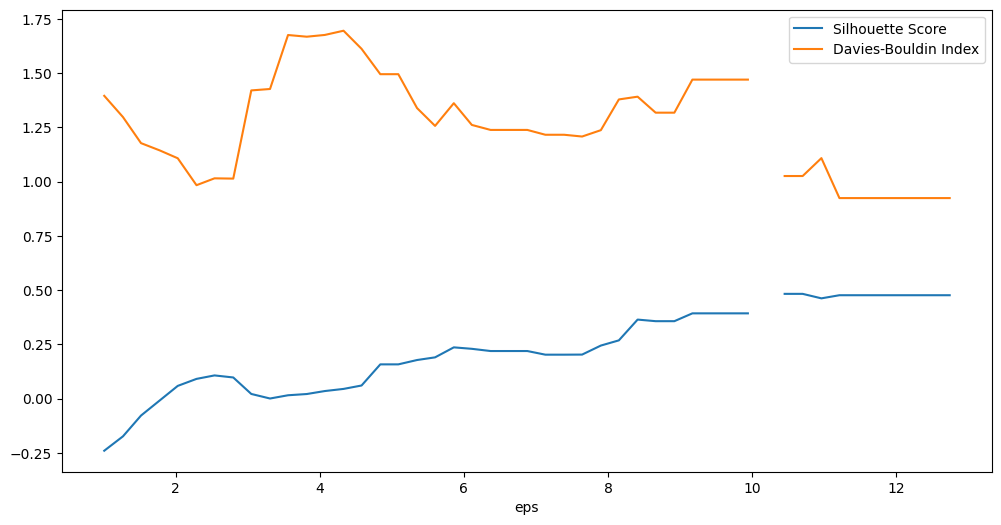

In [85]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

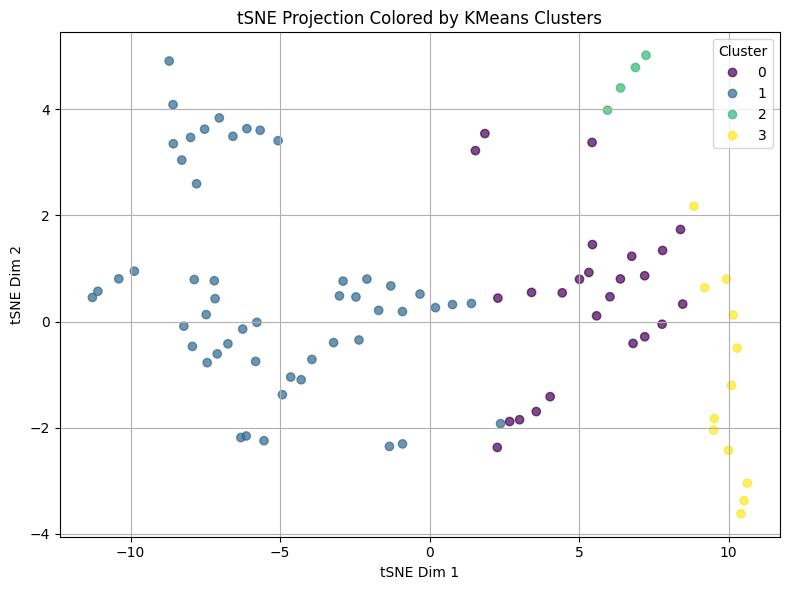

In [86]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        16    224          0.785238   
1    0.05            2        16    222          0.778857   
2    0.06            2        18    215          0.721944   
3    0.06            2        21    206          0.687710   
4    0.07            2        23    198          0.594243   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      3          0.748382   
196  0.99            2         2      3          0.748382   
197  0.99            2         2      3          0.748382   
198  1.00            2         2      3          0.748382   
199  1.00            2         2      3          0.748382   

     Davies-Bouldin Index  
0                0.241572  
1                0.248417  
2                0.312405  
3                0.353978  
4                0.415210  
..                    ...  
195              0.308157  
196              0.308157  
197              0.308157  
198              0.308157  
199              0.308157  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

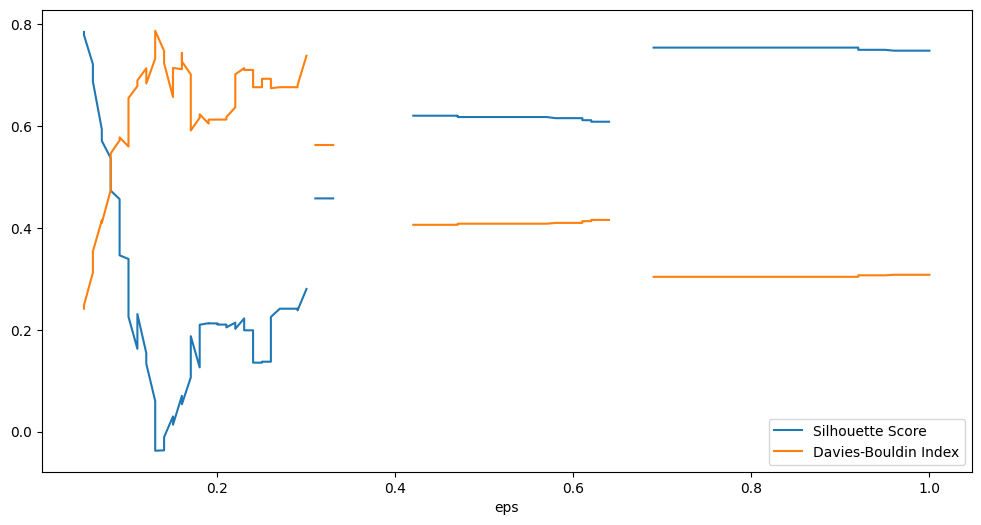

In [87]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [88]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [89]:
#Start with spring and work our way down to winter
season = 2
season_year = 2010
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2010-06-01 to 2010-08-31
Columns: 250 entries, 10000009 to 9000015
dtypes: float64(250)
memory usage: 180.4 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-06-01  0.732224  0.504541  0.589406  0.411947  0.634747  0.720399   
2010-06-02  0.647740  0.495063  0.567370  0.381306  0.584746  0.674516   
2010-06-03  0.612554  0.479765  0.553415  0.351508  0.573446  0.664148   
2010-06-04  0.594477  0.473085  0.544841  0.340835  0.561399  0.653093   
2010-06-05  0.586679  0.456698  0.536936  0.331657  0.549712  0.642369   
...              ...       ...       ...       ...       ...       ...   
2010-08-27  0.670266  0.395942  0.473869  0.365209  0.566313  0.657602   
2010-08-28  0.623775  0.388065  0.439033  0.348241  0.543760  0.636907   
2010-08-29  0.597963  0.385232  0.431578  0.377296  0.541656  0.634977   
2010-08-30  0.590340  0.382435  0.423426  0.339203  0.550917  0.643475   
2010-08-31  0.577002  0.375338  0.413723  0.320395  0.537458  0.631124   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-06-01  0.861308  0.940675  

          2010-06-01  2010-06-02  2010-06-03  2010-06-04  2010-06-05  \
10000009   -0.061043   -0.064613   -0.063401   -0.062790   -0.061896   
11000011   -0.080398   -0.077718   -0.074910   -0.073424   -0.073354   
11000016   -0.073184   -0.071512   -0.068526   -0.067138   -0.066281   
13000011   -0.088270   -0.087483   -0.086027   -0.085009   -0.084377   
13000019   -0.069330   -0.070020   -0.066790   -0.065688   -0.065155   
...              ...         ...         ...         ...         ...   
67000019    0.155511    0.081406    0.062686    0.029295    0.001708   
7000003    -0.095039   -0.093647   -0.091030   -0.089926   -0.089223   
8000001    -0.078110   -0.078240   -0.076630   -0.076427   -0.075933   
9000001    -0.034675   -0.034066   -0.031014   -0.029286   -0.027858   
9000015    -0.035239   -0.034349   -0.031171   -0.029375   -0.027917   

          2010-06-06  2010-06-07  2010-06-08  2010-06-09  2010-06-10  ...  \
10000009   -0.061590   -0.079781   -0.068698   -0.072714  

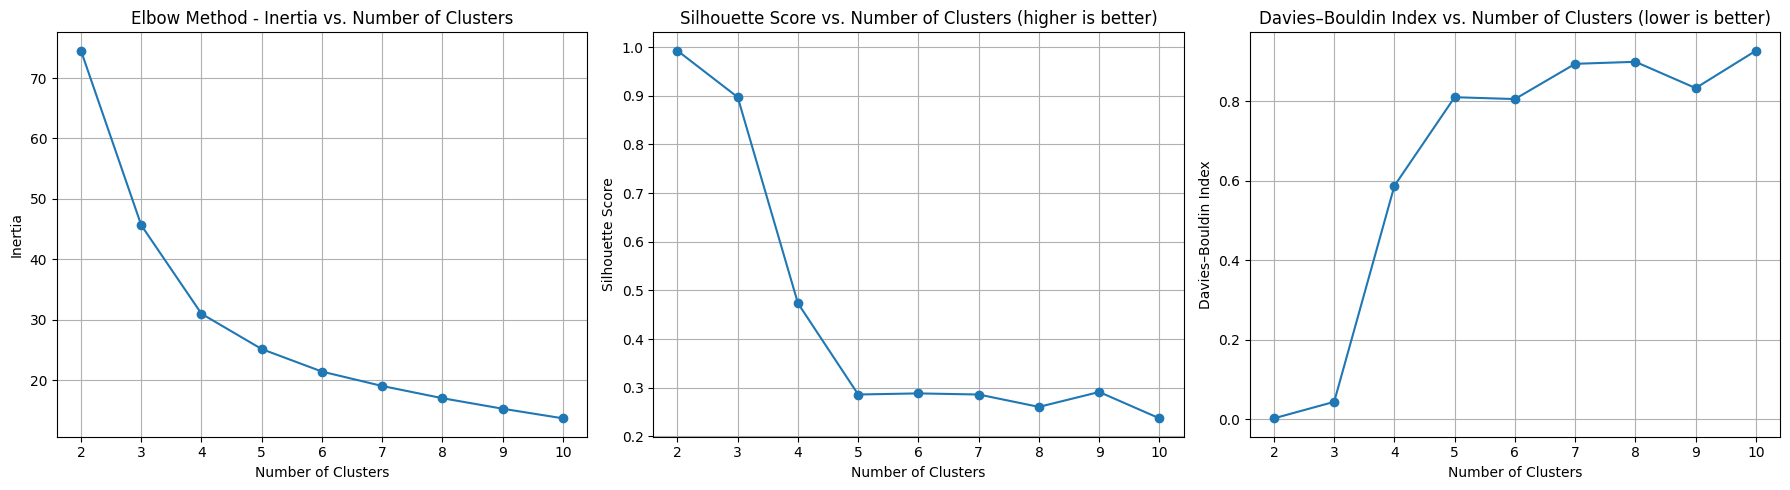

In [90]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-06-01  0.732224  0.504541  0.589406  0.411947  0.634747  0.720399   
2010-06-02  0.647740  0.495063  0.567370  0.381306  0.584746  0.674516   
2010-06-03  0.612554  0.479765  0.553415  0.351508  0.573446  0.664148   
2010-06-04  0.594477  0.473085  0.544841  0.340835  0.561399  0.653093   
2010-06-05  0.586679  0.456698  0.536936  0.331657  0.549712  0.642369   
...              ...       ...       ...       ...       ...       ...   
2010-08-27  0.670266  0.395942  0.473869  0.365209  0.566313  0.657602   
2010-08-28  0.623775  0.388065  0.439033  0.348241  0.543760  0.636907   
2010-08-29  0.597963  0.385232  0.431578  0.377296  0.541656  0.634977   
2010-08-30  0.590340  0.382435  0.423426  0.339203  0.550917  0.643475   
2010-08-31  0.577002  0.375338  0.413723  0.320395  0.537458  0.631124   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-06-01  0.861308  0.940675  

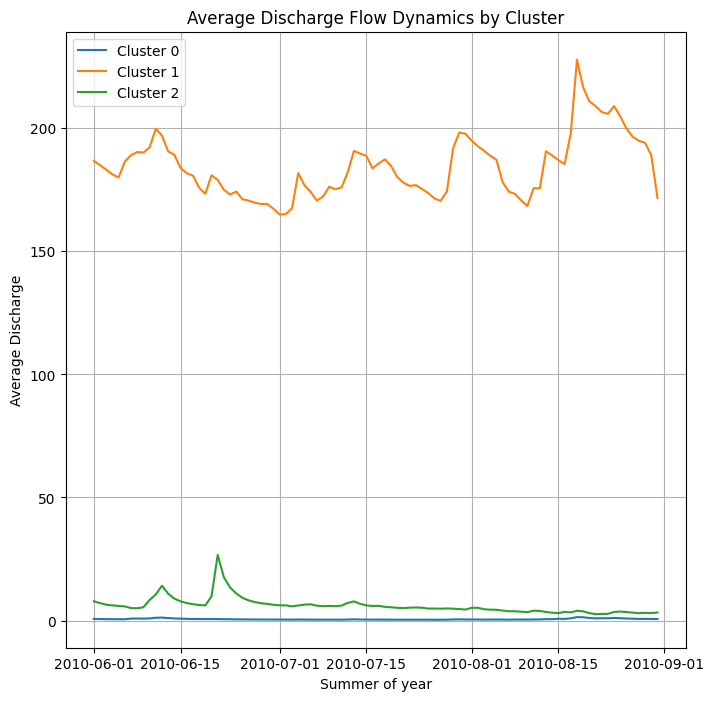

In [91]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [93]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2010-06-01  0.732224  0.504541  0.589406  0.411947  0.634747  0.720399   
2010-06-02  0.647740  0.495063  0.567370  0.381306  0.584746  0.674516   
2010-06-03  0.612554  0.479765  0.553415  0.351508  0.573446  0.664148   
2010-06-04  0.594477  0.473085  0.544841  0.340835  0.561399  0.653093   
2010-06-05  0.586679  0.456698  0.536936  0.331657  0.549712  0.642369   
...              ...       ...       ...       ...       ...       ...   
2010-08-27  0.670266  0.395942  0.473869  0.365209  0.566313  0.657602   
2010-08-28  0.623775  0.388065  0.439033  0.348241  0.543760  0.636907   
2010-08-29  0.597963  0.385232  0.431578  0.377296  0.541656  0.634977   
2010-08-30  0.590340  0.382435  0.423426  0.339203  0.550917  0.643475   
2010-08-31  0.577002  0.375338  0.413723  0.320395  0.537458  0.631124   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-06-01  0.861308  0.940675  0.673910  0.963831  ...  0.374747  0.253514   
2010-06-02  0.750012  0.841829  0.581644  0.680890  ...  0.351952  0.246561   
2010-06-03  0.640206  0.744306  0.561098  0.525408  ...  0.322505  0.218093   
2010-06-04  0.612661  0.719842  0.576955  0.478546  ...  0.298629  0.200656   
2010-06-05  0.604570  0.712656  0.555684  0.451499  ...  0.274615  0.184588   
...              ...       ...       ...       ...  ...       ...       ...   
2010-08-27  1.137157  1.185669  0.547407  0.438331  ...  0.008629  0.084352   
2010-08-28  0.823038  0.906687  0.540271  0.379651  ...  0.009068  0.065956   
2010-08-29  0.744371  0.836819  0.538697  0.333432  ...  0.010643  0.058688   
2010-08-30  0.722064  0.817007  0.620622  0.338706  ...  0.011548  0.071309   
2010-08-31  0.692965  0.791163  0.577344  0.299241  ...  0.011983  0.062138   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2010-06-01  2.011151  2.812499  2.400847  3.279600  0.332320  0.531460   
2010-06-02  2.157920  2.189151  2.701975  2.348882  0.309494  0.488984   
2010-06-03  1.347974  1.346406  1.622012  2.067233  0.293789  0.459921   
2010-06-04  0.957344  0.975955  1.087212  1.645681  0.284707  0.438806   
2010-06-05  0.758382  0.767613  0.830801  1.308229  0.276678  0.427446   
...              ...       ...       ...       ...       ...       ...   
2010-08-27  0.117345  0.367418  0.205108  0.655376  0.364298  0.595142   
2010-08-28  0.113078  0.293550  0.177106  0.612772  0.318308  0.538239   
2010-08-29  0.160645  0.270713  0.166117  0.663919  0.288874  0.496846   
2010-08-30  0.175020  0.315237  0.181048  0.692154  0.273035  0.475085   
2010-08-31  0.177356  0.277825  0.181798  0.594802  0.260488  0.456522   

             9000001   9000015  
2010-06-01  1.042393  1.035767  
2010-06-02  1.003620  1.000318  
2010-06-03  0.986201  0.984393  
2010-06-04  0.976950  0.975935  
2010-06-05  0.972817  0.972156  
...              ...       ...  
2010-08-27  0.787744  0.802953  
2010-08-28  0.629256  0.658054  
2010-08-29  0.636443  0.664626  
2010-08-30  0.637333  0.665439  
2010-08-31  0.616643  0.646523  

[92 rows x 250 columns]

<Axes: >

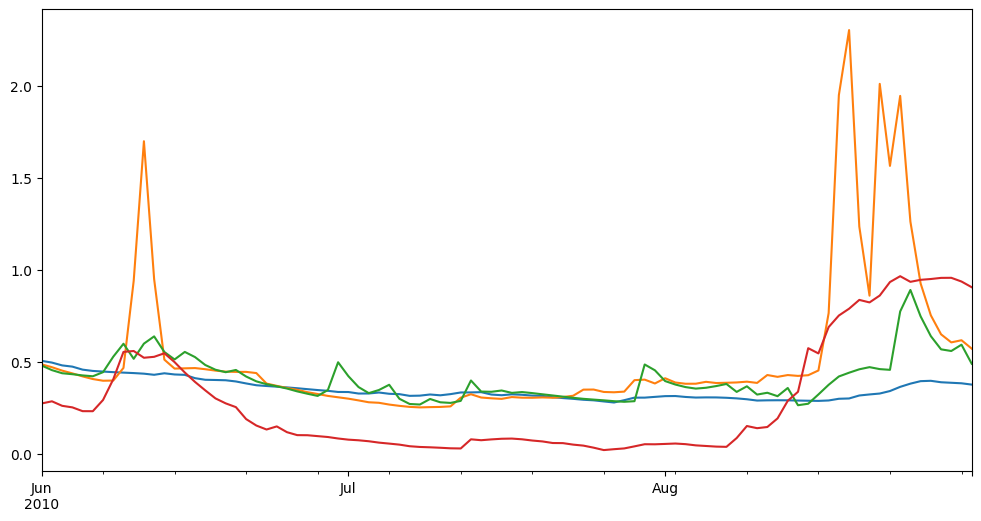

In [94]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

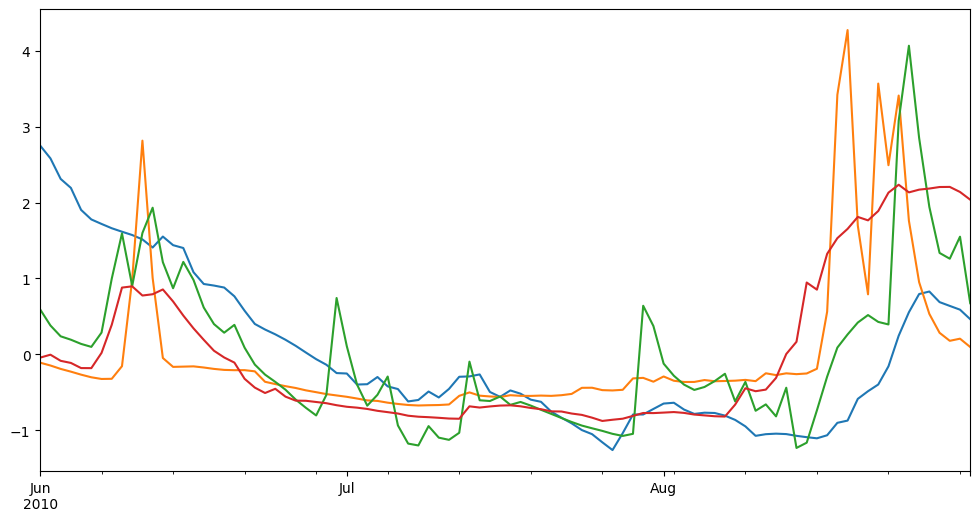

In [95]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

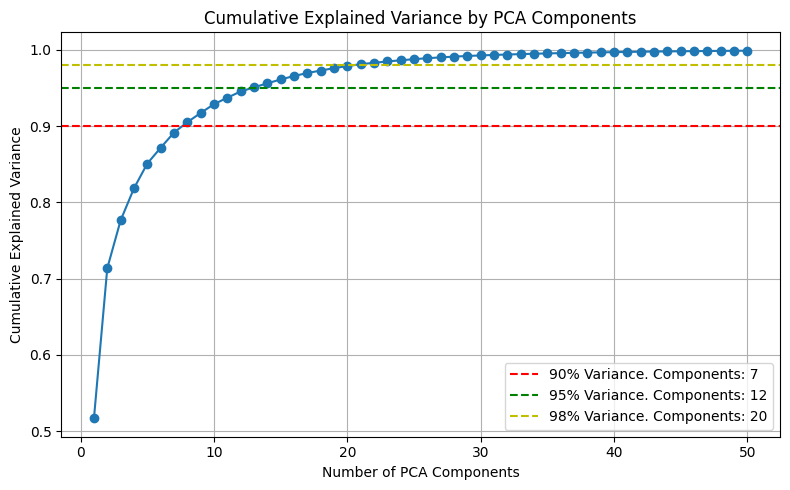

In [96]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 5.51679078,  8.27148928,  2.47280046, ..., -2.79884998,
        -0.56068696, -0.43287805],
       [ 2.96715736,  7.46384097,  2.62768176, ..., -2.4641021 ,
        -0.37643435, -0.12102646],
       [ 0.74461636,  6.47522447,  2.85841958, ..., -0.74539417,
        -0.12693134,  0.10313129],
       ...,
       [ 6.2628974 , -5.48164666,  6.67478878, ...,  0.29876071,
         0.88990628,  0.15013906],
       [ 5.99414739, -4.11182019,  6.52419876, ...,  0.88673597,
         1.37252977, -0.61366408],
       [ 3.37618222, -4.18245208,  6.31333457, ...,  0.90405488,
         1.18926175, -0.94408366]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


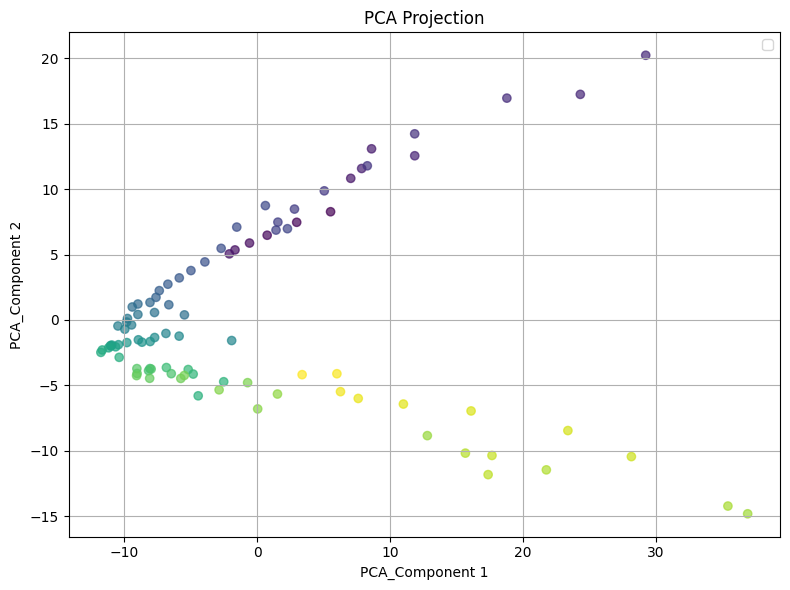

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


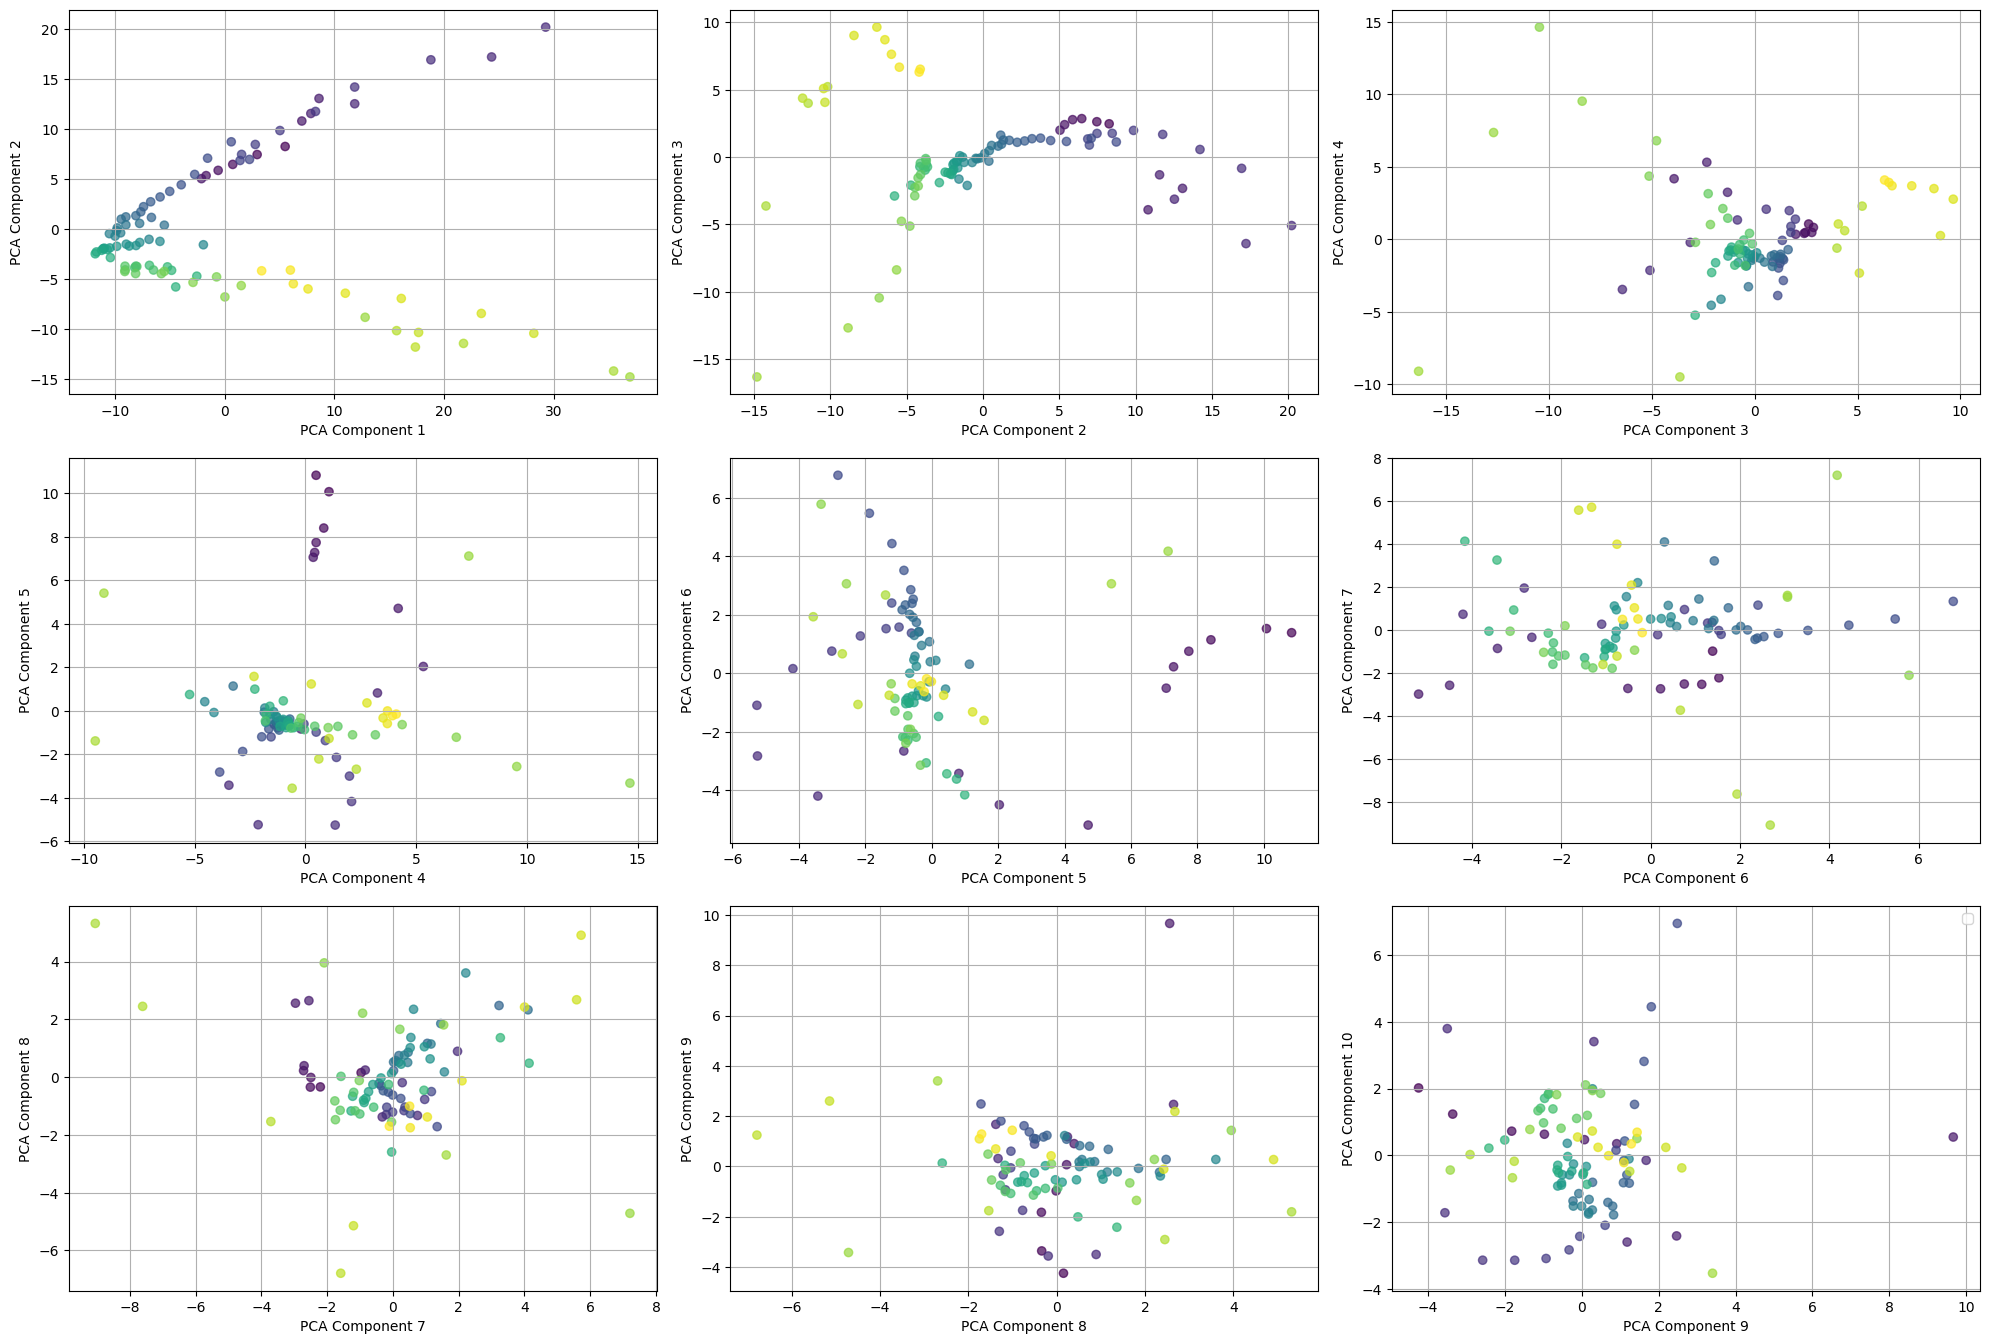

In [99]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [100]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.458
KMeans Davies-Bouldin Index is 0.973


<Axes: xlabel='k'>

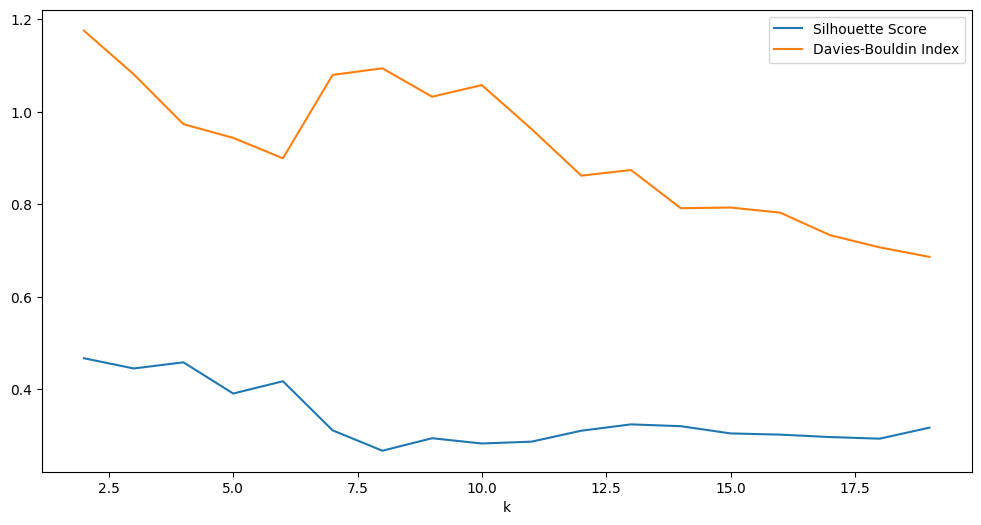

In [101]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         1     89               NaN   
2    1.01            3         1     86               NaN   
3    1.27            3         3     76         -0.178399   
4    1.52            3         4     70         -0.131009   
5    1.78            3         5     62         -0.076782   
6    2.03            3         5     58         -0.091193   
7    2.29            3         4     52         -0.019383   
8    2.54            3         3     51         -0.029975   
9    2.80            3         4     46          0.019428   
10   3.05            3         5     39          0.059229   
11   3.31            3         5     39          0.059229   
12   3.56            3         5     36          0.068848   
13   3.82            3         5     36          0.068848   
14   4.07            3         5     35          0.075822   
15   4.33            3         5     31          0.112181   
16   4.58            3         4     31          0.253113   
17   4.84            3         4     27          0.287222   
18   5.09            3         4     25          0.296295   
19   5.35            3         4     24          0.306517   
20   5.60            3         4     23          0.319695   
21   5.86            3         4     23          0.319695   
22   6.11            3         4     23          0.319695   
23   6.37            3         4     22          0.326836   
24   6.62            3         4     21          0.331001   
25   6.88            3         4     21          0.331001   
26   7.13            3         3     21          0.266655   
27   7.39            3         4     18          0.270505   
28   7.64            3         4     18          0.270505   
29   7.90            3         4     18          0.270505   
30   8.15            3         4     18          0.270505   
31   8.41            3         4     18          0.270505   
32   8.66            3         5     14          0.263463   
33   8.92            3         5     12          0.271350   
34   9.17            3         5     10          0.261752   
35   9.43            3         5     10          0.261752   
36   9.68            3         4      9          0.247384   
37   9.94            3         4      9          0.247384   
38  10.19            3         4      9          0.247384   
39  10.45            3         3      8          0.383279   
40  10.70            3         3      8          0.383279   
41  10.96            3         3      8          0.383279   
42  11.21            3         2      8          0.428649   
43  11.47            3         2      6          0.432763   
44  11.72            3         2      5          0.434830   
45  11.98            3         2      5          0.434830   
46  12.23            3         2      5          0.434830   
47  12.49            3         2      5          0.434830   
48  12.74            3         2      5          0.434830   
49  13.00            3         2      5          0.434830   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.400436  
4               1.371122  
5               1.270957  
6               1.454350  
7               1.454774  
8               1.531285  
9               1.459762  
10              1.581282  
11              1.581282  
12              1.566843  
13              1.566843  
14              1.543122  
15              1.592192  
16              1.680901  
17              1.602036  
18              1.530367  
19              1.481182  
20              1.497175  
21              1.497175  
22              1.497175  
23              1.461550  
24              1.531413  
25              1.531413  
26              1.559723  
27              1.507666  
28              1.507666  
29              1.507666  
30              1.507666  
31              1.507666  
32 

<Axes: xlabel='eps'>

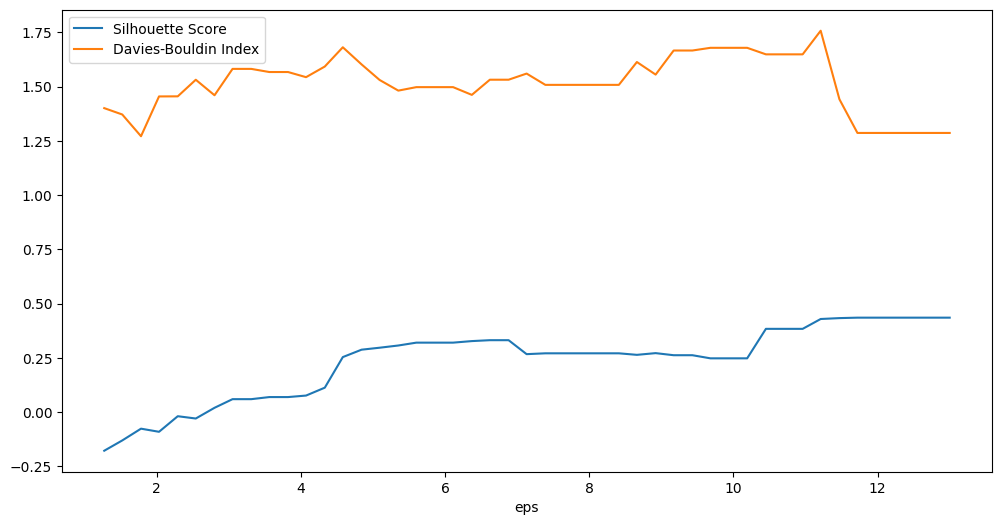

In [102]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

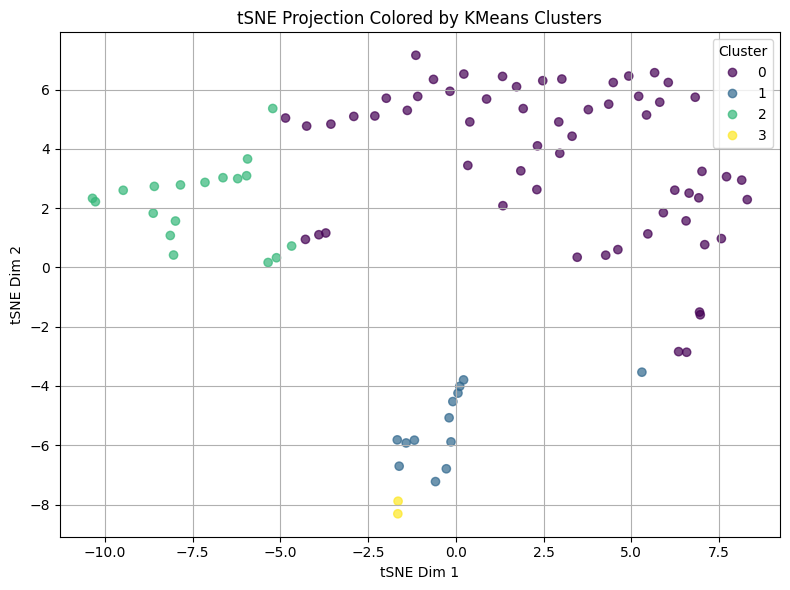

In [103]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        23    130          0.322674   
1    0.05            2        27    112          0.321030   
2    0.06            2        27    101          0.300928   
3    0.06            2        24     95          0.067069   
4    0.07            2        20     89          0.163594   
..    ...          ...       ...    ...               ...   
195  0.98            2         1      3               NaN   
196  0.99            2         1      3               NaN   
197  0.99            2         1      3               NaN   
198  1.00            2         1      3               NaN   
199  1.00            2         1      3               NaN   

     Davies-Bouldin Index  
0                0.636684  
1                0.565421  
2                0.596237  
3                0.757387  
4                0.744085  
..                    ...  
195                   NaN  
196                   NaN  
197                   NaN  
198                   NaN  
199                   NaN  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

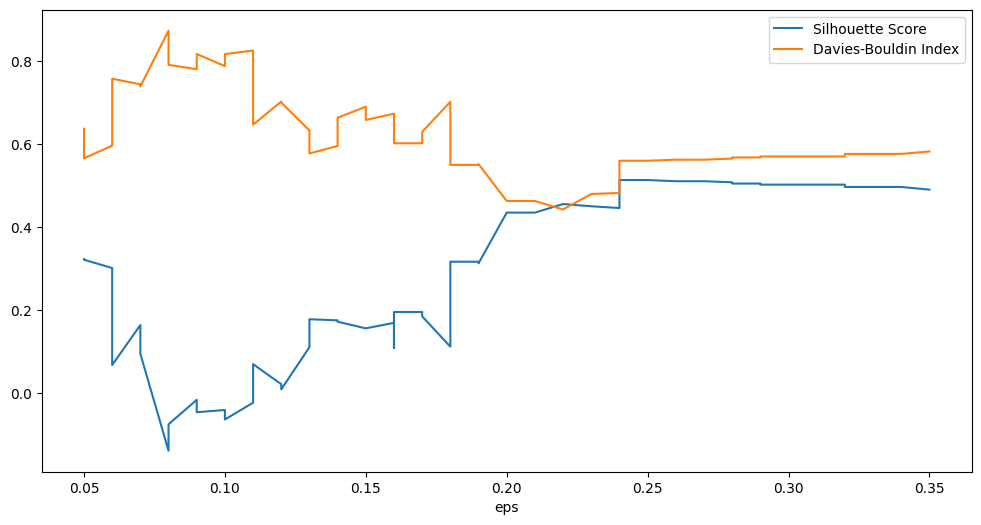

In [104]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [105]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [106]:
#Start with spring and work our way down to winter
season = 3
season_year = 2010
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2010-09-01 to 2010-11-30
Columns: 254 entries, 10000009 to 9000015
dtypes: float64(254)
memory usage: 181.3 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-09-01  0.565017  0.370131  0.406490  0.317815  0.527774  0.622238   
2010-09-02  0.551698  0.363567  0.404159  0.302674  0.521063  0.616080   
2010-09-03  0.537897  0.357497  0.405287  0.290618  0.517566  0.612871   
2010-09-04  0.526075  0.352564  0.399197  0.284772  0.527710  0.622179   
2010-09-05  0.512592  0.346843  0.396317  0.273836  0.529326  0.623662   
...              ...       ...       ...       ...       ...       ...   
2010-11-26  0.982447  1.702452  1.299025  0.630318  0.880230  0.945659   
2010-11-27  0.939864  1.678674  1.234741  0.594072  0.850235  0.918135   
2010-11-28  0.908827  1.636932  1.184336  0.578217  0.816647  0.887314   
2010-11-29  0.910159  1.592826  1.225897  0.561179  0.777139  0.851061   
2010-11-30  0.912528  1.549282  1.186219  0.578559  0.777661  0.851540   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-09-01  0.684791  0.783903  

          2010-09-01  2010-09-02  2010-09-03  2010-09-04  2010-09-05  \
10000009   -0.065896   -0.064752   -0.063957   -0.063928   -0.063287   
11000011   -0.084334   -0.082857   -0.081442   -0.080853   -0.079389   
11000016   -0.080894   -0.078950   -0.076810   -0.076305   -0.074583   
13000011   -0.089284   -0.088717   -0.087925   -0.087466   -0.086481   
13000019   -0.069419   -0.067700   -0.065928   -0.063769   -0.061661   
...              ...         ...         ...         ...         ...   
67000019   -0.069340   -0.071236   -0.073417   -0.075925   -0.077256   
7000003    -0.095732   -0.094798   -0.093661   -0.092468   -0.090546   
8000001    -0.077207   -0.076208   -0.075370   -0.074157   -0.071563   
9000001    -0.060529   -0.056869   -0.055327   -0.053929   -0.052705   
9000015    -0.057743   -0.054134   -0.052516   -0.051114   -0.049843   

          2010-09-06  2010-09-07  2010-09-08  2010-09-09  2010-09-10  ...  \
10000009   -0.063490   -0.062751   -0.062838   -0.063951  

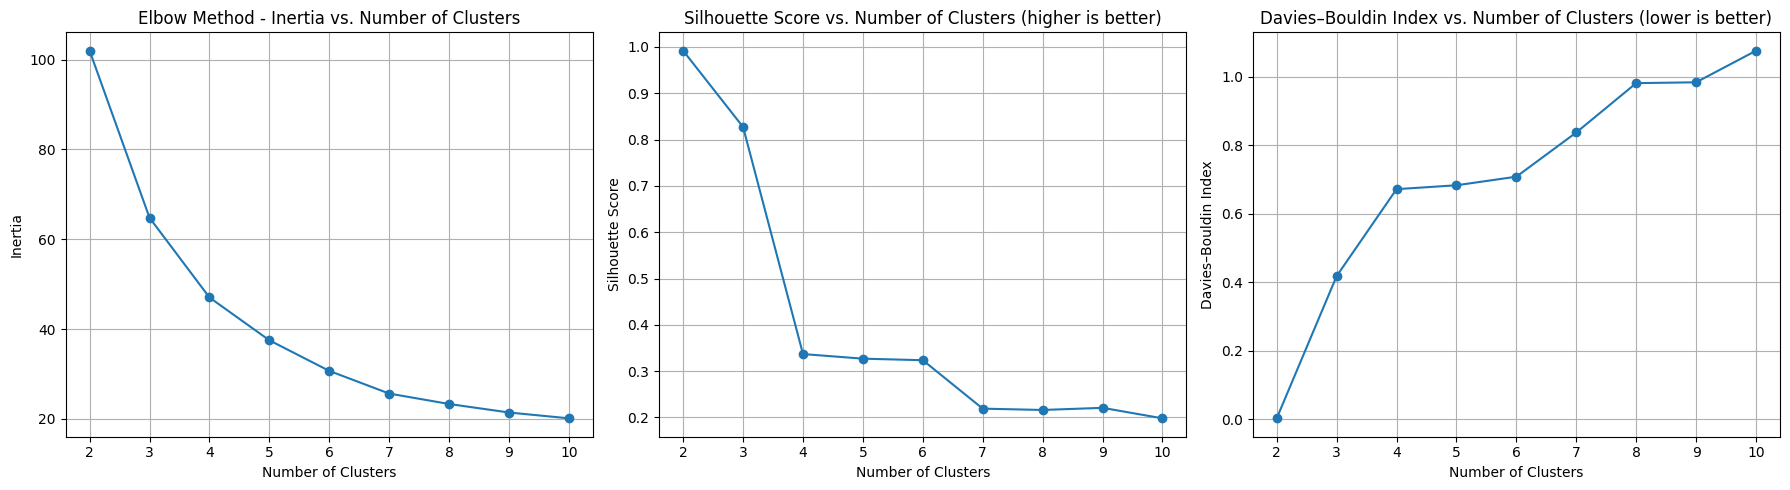

In [107]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-09-01  0.565017  0.370131  0.406490  0.317815  0.527774  0.622238   
2010-09-02  0.551698  0.363567  0.404159  0.302674  0.521063  0.616080   
2010-09-03  0.537897  0.357497  0.405287  0.290618  0.517566  0.612871   
2010-09-04  0.526075  0.352564  0.399197  0.284772  0.527710  0.622179   
2010-09-05  0.512592  0.346843  0.396317  0.273836  0.529326  0.623662   
...              ...       ...       ...       ...       ...       ...   
2010-11-26  0.982447  1.702452  1.299025  0.630318  0.880230  0.945659   
2010-11-27  0.939864  1.678674  1.234741  0.594072  0.850235  0.918135   
2010-11-28  0.908827  1.636932  1.184336  0.578217  0.816647  0.887314   
2010-11-29  0.910159  1.592826  1.225897  0.561179  0.777139  0.851061   
2010-11-30  0.912528  1.549282  1.186219  0.578559  0.777661  0.851540   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-09-01  0.684791  0.783903  

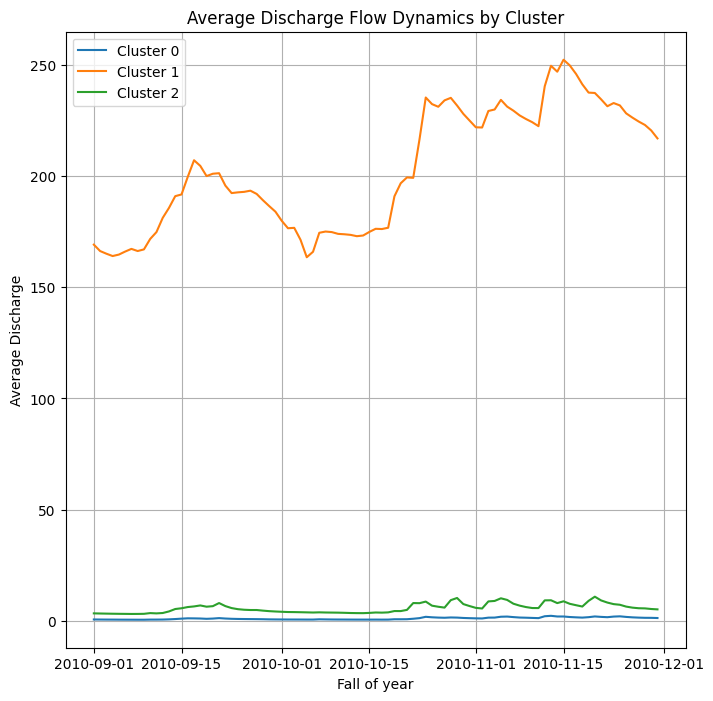

In [108]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [110]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2010-09-01  0.565017  0.370131  0.406490  0.317815  0.527774  0.622238   
2010-09-02  0.551698  0.363567  0.404159  0.302674  0.521063  0.616080   
2010-09-03  0.537897  0.357497  0.405287  0.290618  0.517566  0.612871   
2010-09-04  0.526075  0.352564  0.399197  0.284772  0.527710  0.622179   
2010-09-05  0.512592  0.346843  0.396317  0.273836  0.529326  0.623662   
...              ...       ...       ...       ...       ...       ...   
2010-11-26  0.982447  1.702452  1.299025  0.630318  0.880230  0.945659   
2010-11-27  0.939864  1.678674  1.234741  0.594072  0.850235  0.918135   
2010-11-28  0.908827  1.636932  1.184336  0.578217  0.816647  0.887314   
2010-11-29  0.910159  1.592826  1.225897  0.561179  0.777139  0.851061   
2010-11-30  0.912528  1.549282  1.186219  0.578559  0.777661  0.851540   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-09-01  0.684791  0.783903  0.561764  0.272801  ...  0.011736  0.050344   
2010-09-02  0.675817  0.775933  0.551200  0.280700  ...  0.011669  0.053482   
2010-09-03  0.700038  0.797445  0.557547  0.281591  ...  0.011822  0.035353   
2010-09-04  0.734700  0.828230  0.594335  0.312502  ...  0.011706  0.038792   
2010-09-05  0.686843  0.785726  0.537845  0.289173  ...  0.011516  0.026514   
...              ...       ...       ...       ...  ...       ...       ...   
2010-11-26  0.878731  0.956150  0.980608  1.453674  ...  3.195006  1.611985   
2010-11-27  0.862213  0.941479  0.917006  1.104228  ...  2.868812  1.324341   
2010-11-28  0.827174  0.910360  0.900015  1.866021  ...  2.445804  1.085383   
2010-11-29  0.816505  0.900884  0.877533  1.527874  ...  2.065761  0.975338   
2010-11-30  0.918429  0.991407  1.083702  1.476877  ...  1.745975  0.862803   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2010-09-01  0.153991  0.246141  0.166668  0.528613  0.249651  0.445459   
2010-09-02  0.136954  0.210297  0.146952  0.484322  0.239478  0.432656   
2010-09-03  0.117505  0.180462  0.129312  0.440294  0.231434  0.420151   
2010-09-04  0.107518  0.155440  0.115774  0.403094  0.233500  0.421209   
2010-09-05  0.101274  0.137535  0.107024  0.368797  0.231997  0.427407   
...              ...       ...       ...       ...       ...       ...   
2010-11-26  5.708058  5.571259  5.362699  9.127136  1.000681  1.645272   
2010-11-27  5.304433  4.984851  4.635996  8.164875  0.926832  1.450090   
2010-11-28  5.019684  4.783056  4.164083  7.833740  0.920908  1.417749   
2010-11-29  4.660922  4.223568  3.139933  6.915652  0.776621  1.320581   
2010-11-30  4.382259  3.775708  2.994878  6.180738  0.756144  1.564299   

             9000001   9000015  
2010-09-01  0.621746  0.651188  
2010-09-02  0.633605  0.662030  
2010-09-03  0.626944  0.655941  
2010-09-04  0.628581  0.657438  
2010-09-05  0.621516  0.650979  
...              ...       ...  
2010-11-26  2.041516  1.949219  
2010-11-27  1.957326  1.872248  
2010-11-28  1.907580  1.826768  
2010-11-29  1.687141  1.625230  
2010-11-30  1.817010  1.743964  

[91 rows x 254 columns]

<Axes: >

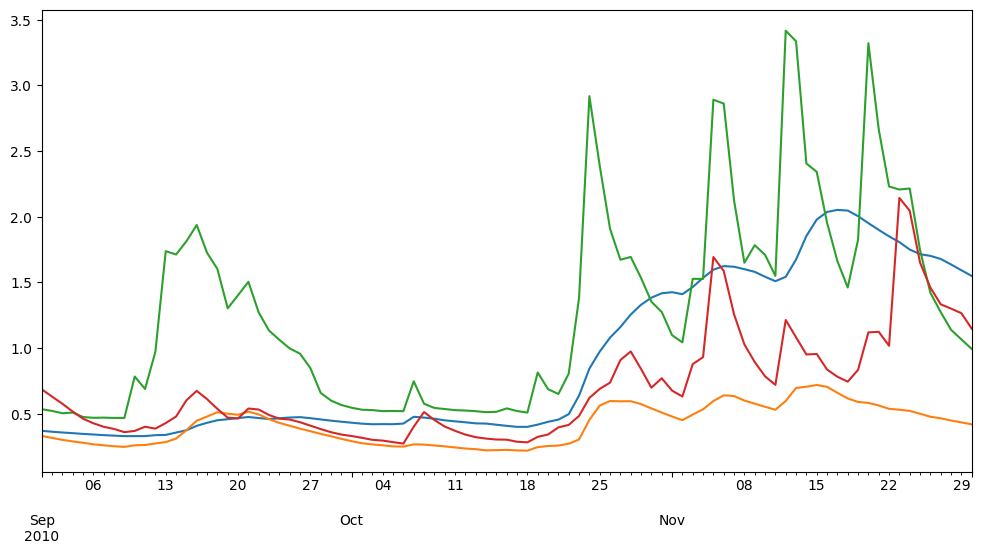

In [111]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

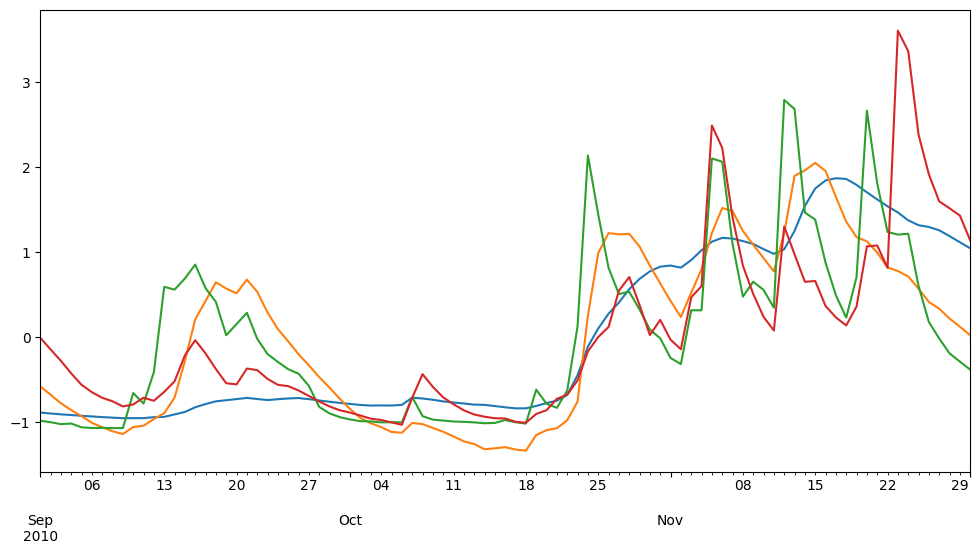

In [112]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

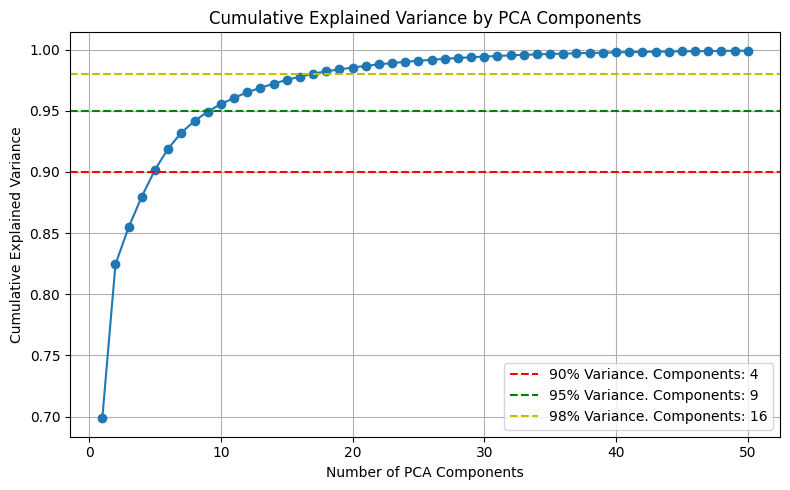

In [113]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [114]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-1.23324891e+01,  2.08472197e+00,  1.35731467e+00, ...,
         4.71344791e-01, -2.61049977e-01, -4.81814640e-01],
       [-1.32033328e+01,  1.81518075e+00,  1.15586514e+00, ...,
         1.93495998e-01, -3.86524594e-01, -2.46379667e-01],
       [-1.38403646e+01,  1.67982915e+00,  1.00917251e+00, ...,
         6.43305243e-02, -2.57363270e-01, -5.32601742e-02],
       ...,
       [ 7.62083917e+00,  1.16780671e+01,  3.57667671e-01, ...,
        -2.71681851e-01,  1.94555207e-01, -6.56854092e-01],
       [ 6.51559746e+00,  1.19392018e+01,  1.22472950e+00, ...,
        -1.18972310e+00,  4.45806363e-01,  4.41287815e-01],
       [ 5.43770381e+00,  1.04456649e+01,  3.01143117e-01, ...,
         1.33416417e-02,  2.97593148e-01, -9.10729845e-01]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


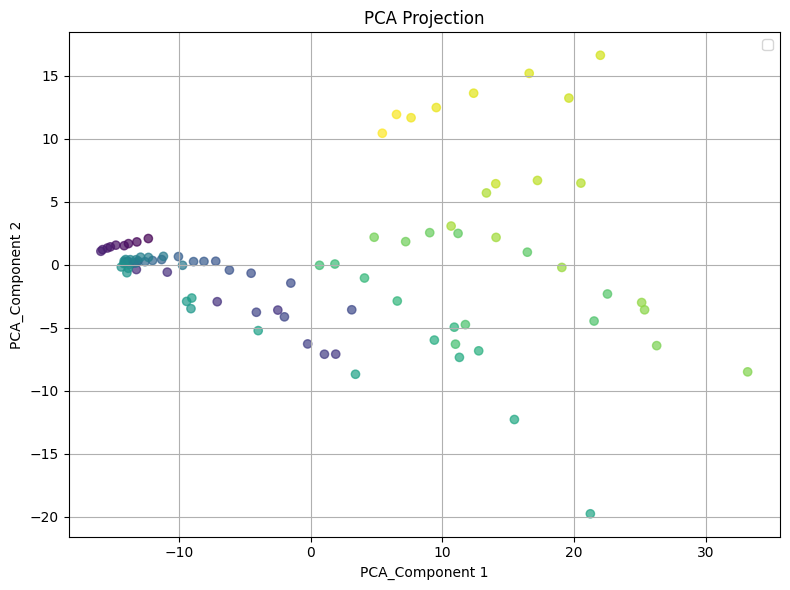

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


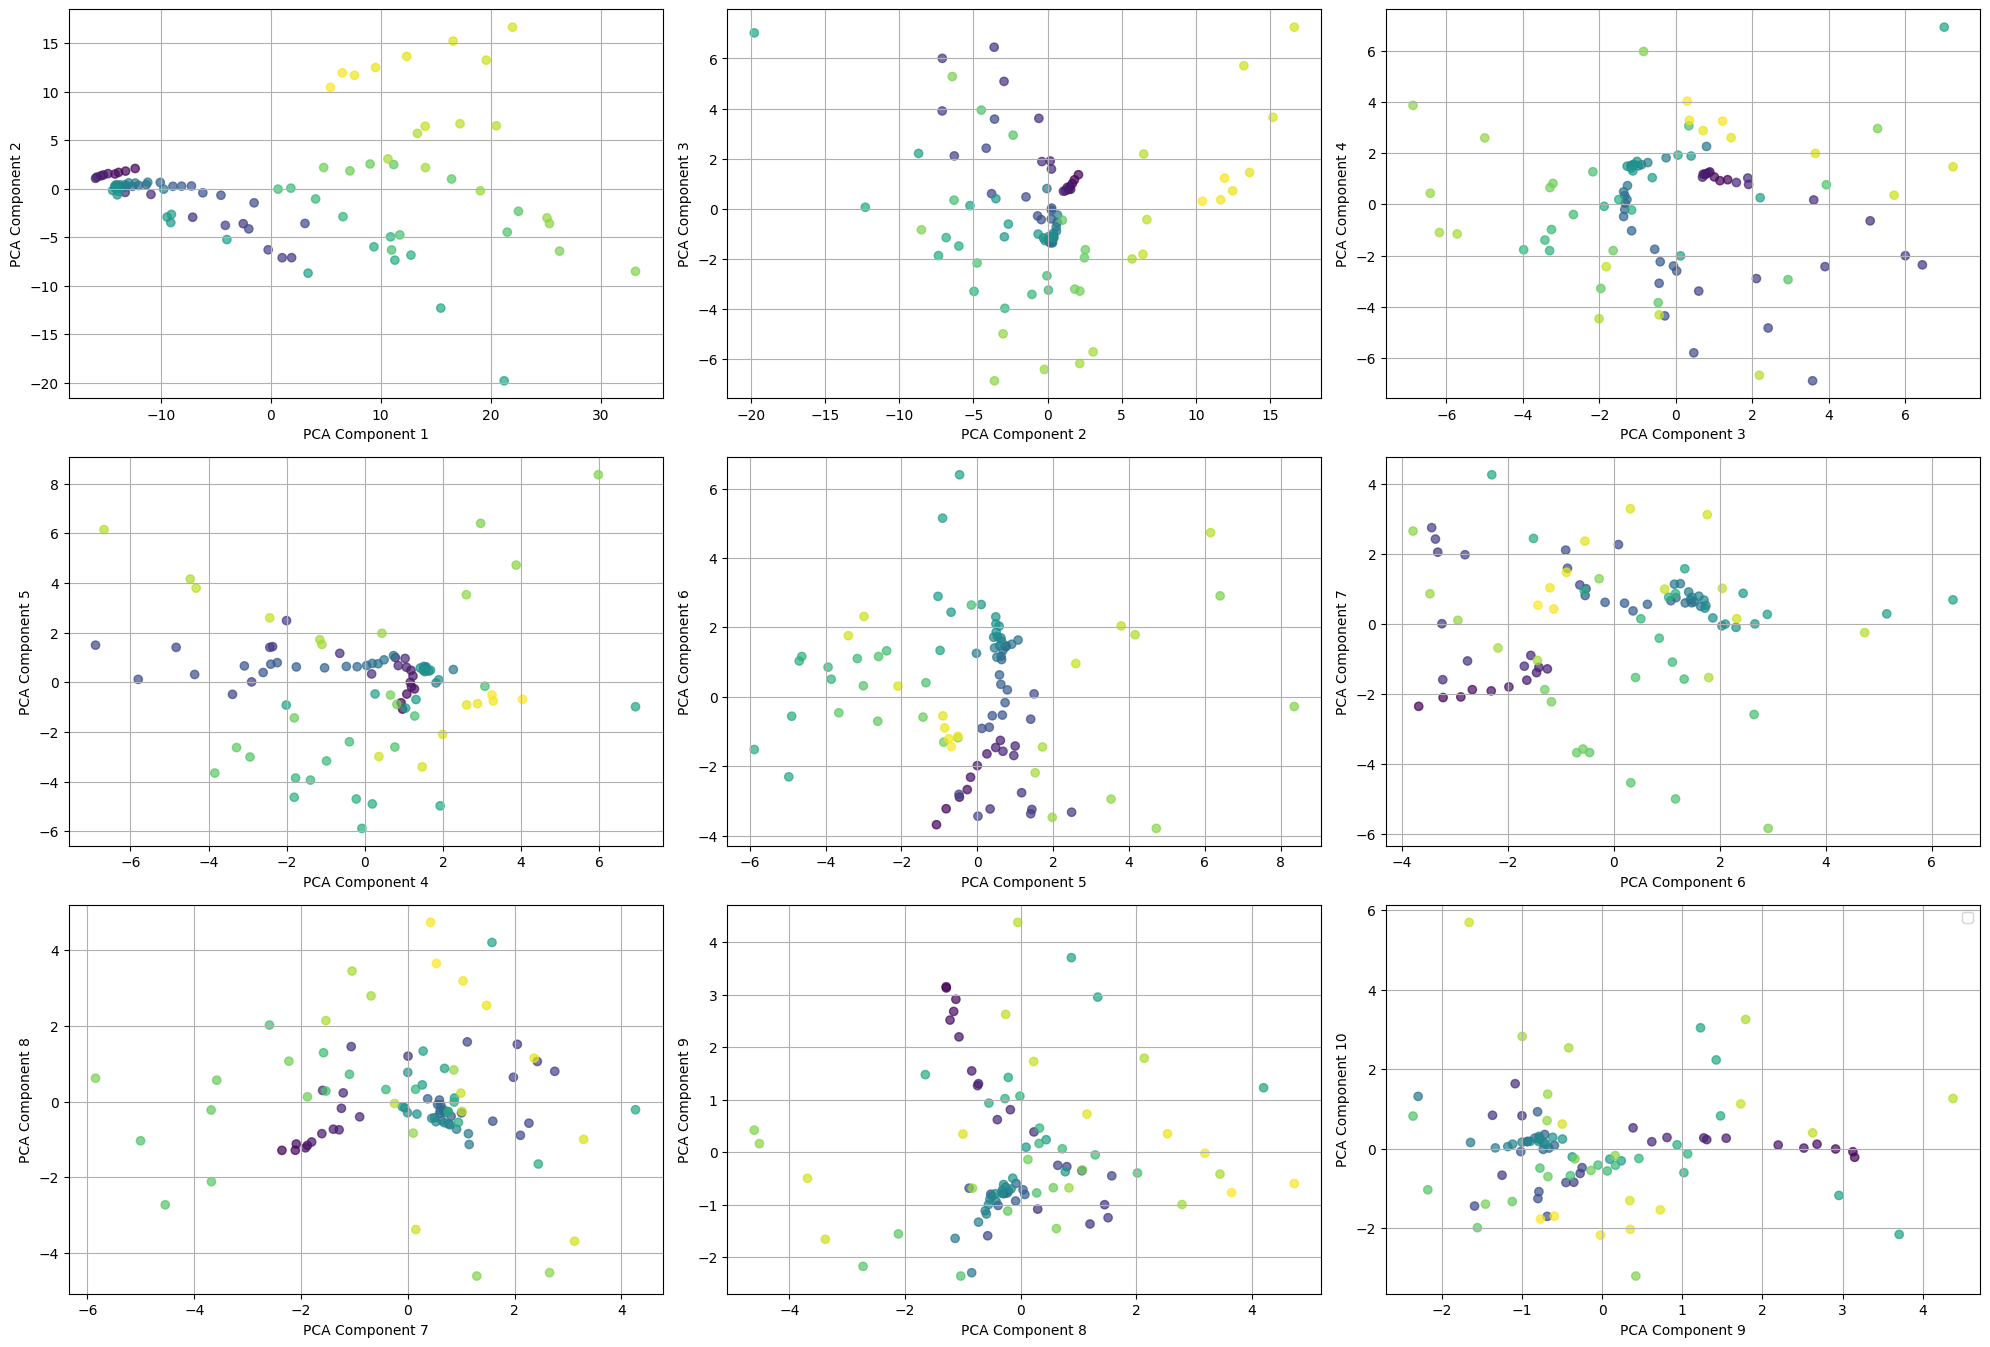

In [116]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.430
KMeans Davies-Bouldin Index is 1.107


<Axes: xlabel='k'>

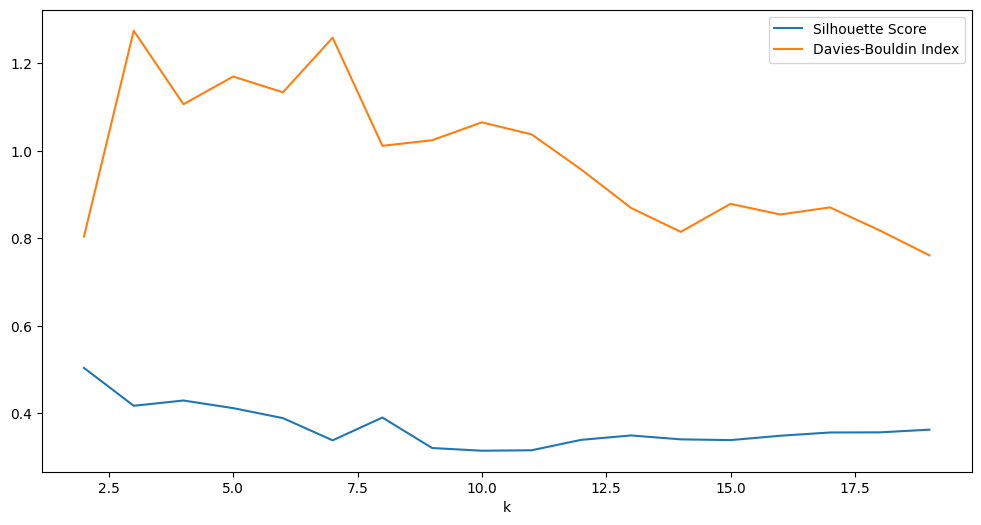

In [118]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         1     88               NaN   
1    0.76            3         2     76         -0.050238   
2    1.01            3         4     66          0.082227   
3    1.27            3         2     65          0.183014   
4    1.52            3         4     58          0.152844   
5    1.78            3         4     56          0.188054   
6    2.03            3         4     56          0.188054   
7    2.29            3         4     55          0.194904   
8    2.54            3         4     54          0.198344   
9    2.80            3         4     51          0.260674   
10   3.05            3         3     50          0.243644   
11   3.31            3         4     47          0.113912   
12   3.56            3         4     46          0.115473   
13   3.82            3         6     39          0.128778   
14   4.07            3         6     38          0.146394   
15   4.33            3         6     37          0.155355   
16   4.58            3         6     37          0.155355   
17   4.84            3         7     33          0.150805   
18   5.09            3         7     28          0.114554   
19   5.35            3         6     27          0.046634   
20   5.60            3         5     26          0.047341   
21   5.86            3         4     25          0.310815   
22   6.11            3         4     23          0.321010   
23   6.37            3         4     23          0.321010   
24   6.62            3         3     23          0.361410   
25   6.88            3         3     21          0.367502   
26   7.13            3         4     18          0.367681   
27   7.39            3         4     15          0.392005   
28   7.64            3         5     12          0.382506   
29   7.90            3         5     11          0.392800   
30   8.15            3         5      9          0.399260   
31   8.41            3         3      7          0.443398   
32   8.66            3         3      5          0.447682   
33   8.92            3         3      5          0.447682   
34   9.17            3         3      5          0.447682   
35   9.43            3         2      5          0.275459   
36   9.68            3         2      5          0.275459   
37   9.94            3         2      4          0.298156   
38  10.19            3         2      3          0.307455   
39  10.45            3         2      3          0.307455   
40  10.70            3         2      3          0.307455   
41  10.96            3         2      3          0.307455   
42  11.21            3         2      3          0.307455   
43  11.47            3         1      3               NaN   
44  11.72            3         1      3               NaN   
45  11.98            3         1      3               NaN   
46  12.23            3         1      3               NaN   
47  12.49            3         1      3               NaN   
48  12.74            3         1      3               NaN   
49  13.00            3         1      3               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               0.962265  
2               0.861958  
3               0.810299  
4               0.806375  
5               0.772998  
6               0.772998  
7               0.783547  
8               0.800518  
9               0.784242  
10              0.861244  
11              1.155834  
12              1.245623  
13              1.203675  
14              1.195865  
15              1.201660  
16              1.201660  
17              1.404921  
18              1.488935  
19              1.572254  
20              1.567078  
21              1.454727  
22              1.382276  
23              1.382276  
24              1.431427  
25              1.447998  
26              1.470007  
27              1.503447  
28              1.449382  
29              1.259188  
30              1.195931  
31              1.404398  
32 

<Axes: xlabel='eps'>

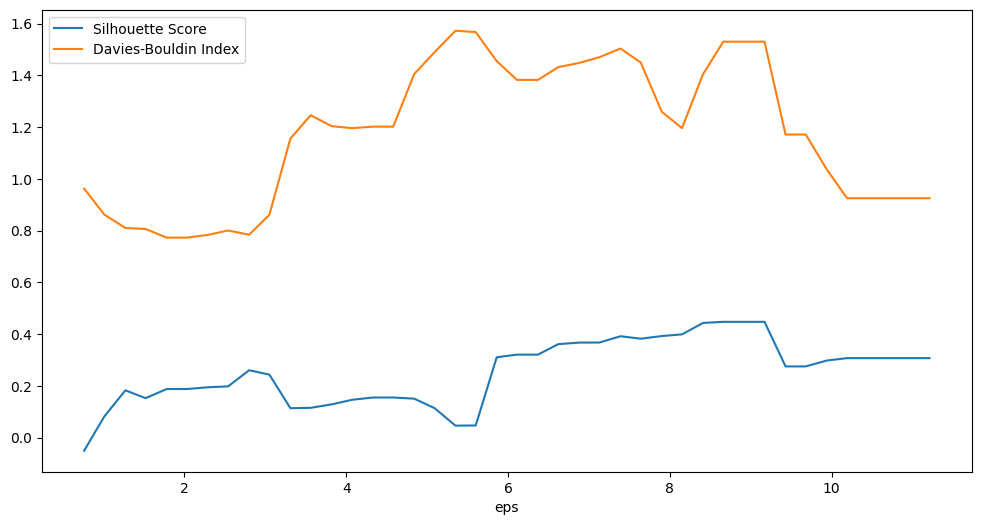

In [119]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

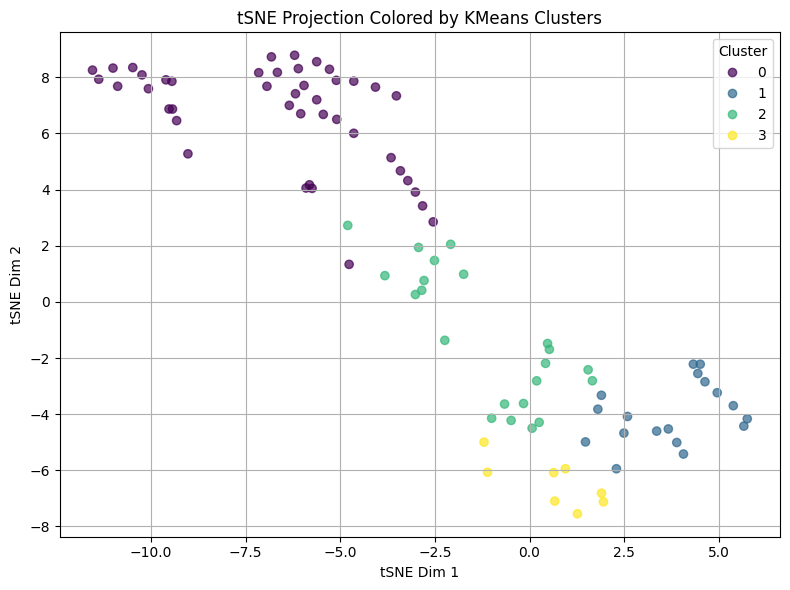

In [120]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        22    204          0.693595              0.362630
1   0.07            2        30    150          0.453158              0.621738
2   0.09            2        31    103          0.337991              0.658397
3   0.11            2        17     65          0.090207              0.741521
4   0.13            2        12     46          0.000204              0.757107
5   0.15            2        11     31          0.001834              0.722676
6   0.17            2         6     27          0.060772              0.730729
7   0.19            2         7     20          0.047212              0.770379
8   0.21            2         4     20          0.224111              0.694573
9   0.22            2         2     19          0.397118              0.518781
10  0.24            2         2     18          0.395855              0.520193
11  0.26            2         2     18          0.395855              0.520193
12  0.28            2         1     18               NaN                   NaN
13  0.30            2         2     15          0.691217              0.326340
14  0.32            2         2     14          0.687983              0.328287
15  0.34            2         2     12          0.685426              0.329904
16  0.36            2         2     12          0.685426              0.329904
17  0.38            2         3     10          0.531904              0.449328
18  0.40            2         3      9          0.532513              0.459895
19  0.42            2         4      7          0.501864              0.492758
20  0.44            2         3      7          0.521732              0.495310
21  0.46            2         3      7          0.521732              0.495310
22  0.48            2         3      6          0.514699              0.501733
23  0.50            2         3      6          0.514699              0.501733
24  0.52            2         3      5          0.513235              0.532546
25  0.53            2         2      5          0.657110              0.467552
26  0.55            2         2      5          0.657110              0.467552
27  0.57            2         2      4          0.650512              0.473577
28  0.59            2         2      4          0.650512              0.473577
29  0.61            2         1      4               NaN                   NaN
30  0.63            2         1      4               NaN                   NaN
31  0.65            2         1      4               NaN                   NaN
32  0.67            2         1      4               NaN                   NaN
33  0.69            2         1      4               NaN                   NaN
34  0.71            2         1      4               NaN                   NaN
35  0.73            2         1      4               NaN                   NaN
36  0.75            2         1      4               NaN                   NaN
37  0.77            2         1      4               NaN                   NaN
38  0.79            2         1      4               NaN                   NaN
39  0.81            2         1      4               NaN                   NaN
40  0.83            2         1      4               NaN                   NaN
41  0.84            2         1      3               NaN                   NaN
42  0.86            2         1      3               NaN                   NaN
43  0.88            2         1      3               NaN                   NaN
44  0.90            2         1      3               NaN                   NaN
45  0.92            2         1      3               NaN                   NaN
46  0.94            2         1      3               NaN                   NaN
47  0.96            2         1      3               NaN                   NaN
48  0.98            2         1      2               NaN                   NaN
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

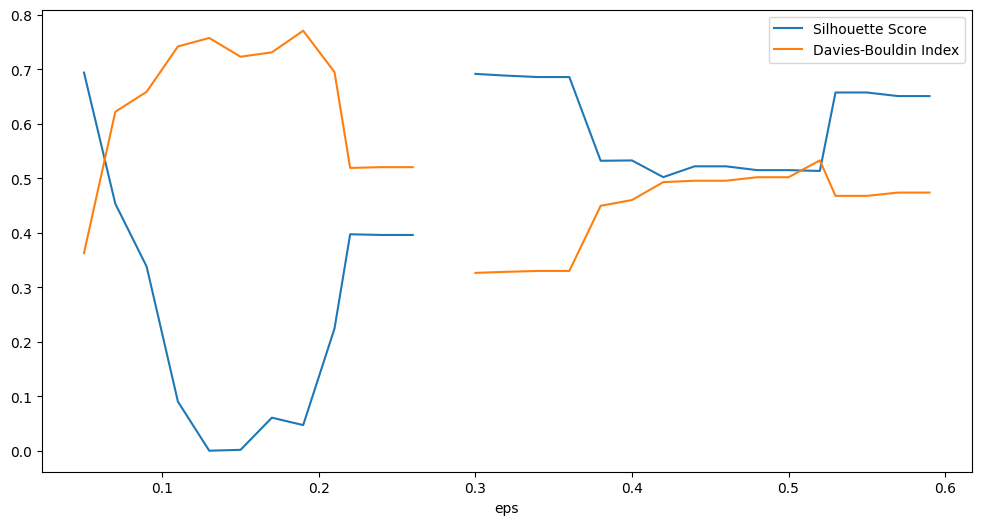

In [121]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [122]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [123]:
season = 4
season_year = 2010
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2010-12-01 to 2011-02-28
Columns: 252 entries, 10000009 to 9000015
dtypes: float64(252)
memory usage: 177.9 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-12-01  0.913098  1.507937  1.146489  0.555464  0.787141  0.860239   
2010-12-02  0.896074  1.466954  1.106759  0.544895  0.768500  0.843133   
2010-12-03  0.879049  1.425970  1.067030  0.541440  0.760018  0.835349   
2010-12-04  0.862024  1.384986  1.025252  0.528284  0.747608  0.823962   
2010-12-05  0.844999  1.344003  1.018602  0.534738  0.746356  0.822813   
...              ...       ...       ...       ...       ...       ...   
2011-02-24  0.705627  1.446732  0.989337  0.480136  0.799271  0.871370   
2011-02-25  0.697608  1.408564  0.914299  0.479592  0.793937  0.866475   
2011-02-26  1.138625  1.402647  1.695254  0.689335  1.189815  1.229740   
2011-02-27  1.210791  1.485427  2.149142  0.611153  1.369527  1.394648   
2011-02-28  0.865996  1.510866  1.532976  0.546804  0.977595  1.035003   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-12-01  0.791731  0.878882  

          2010-12-01  2010-12-02  2010-12-03  2010-12-04  2010-12-05  \
10000009   -0.352334   -0.330722   -0.306513   -0.263185   -0.278538   
11000011    0.427134    0.398722    0.452445    0.503700    0.456410   
11000016   -0.046502   -0.061518   -0.045654   -0.023824   -0.022851   
13000011   -0.820972   -0.779443   -0.775010   -0.752590   -0.735501   
13000019   -0.517387   -0.493730   -0.471692   -0.430967   -0.423824   
...              ...         ...         ...         ...         ...   
67000019    6.356754    5.852496    6.133939    5.673083    5.874249   
7000003    -0.538599   -0.509528   -0.473092   -0.505084   -0.563773   
8000001     0.206937    0.003560    0.006884    0.015743   -0.018653   
9000001     0.876764    0.789808    0.894940    0.985461    1.063955   
9000015     0.777218    0.701292    0.802161    0.891357    0.964011   

          2010-12-06  2010-12-07  2010-12-08  2010-12-09  2010-12-10  ...  \
10000009   -0.297726   -0.293090   -0.268830   -0.328524  

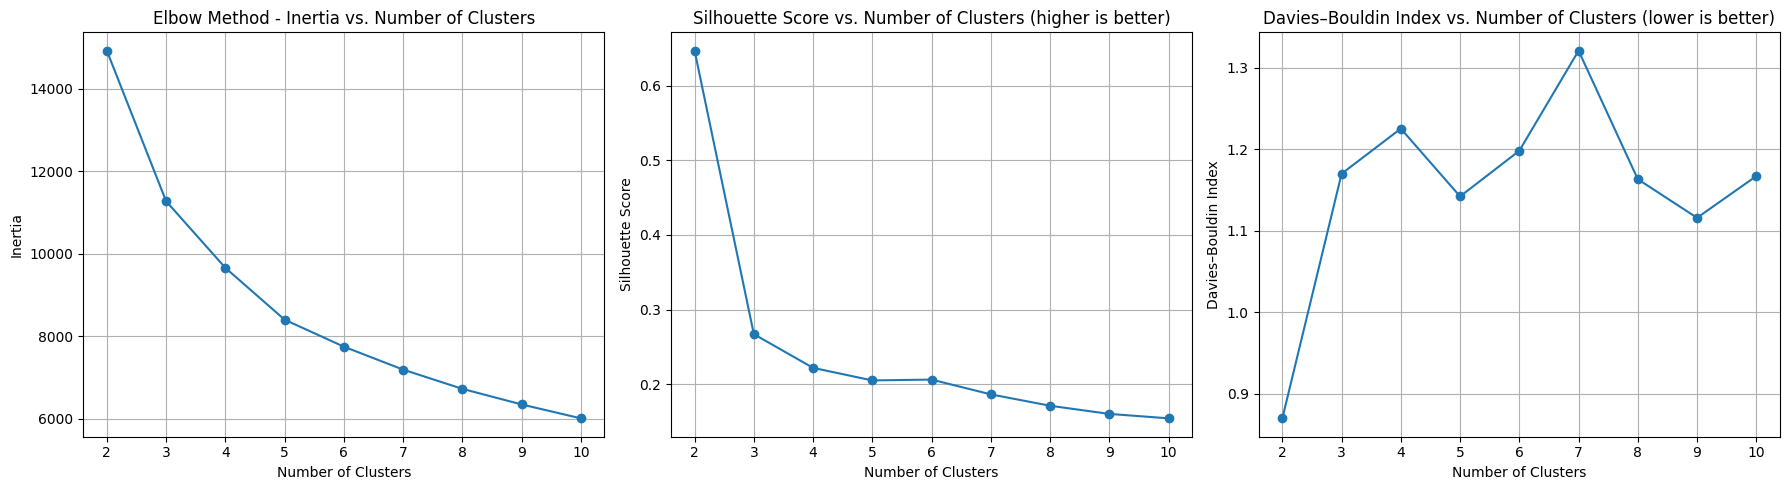

In [124]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        2
11000016        2
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2010-12-01  0.913098  1.507937  1.146489  0.555464  0.787141  0.860239   
2010-12-02  0.896074  1.466954  1.106759  0.544895  0.768500  0.843133   
2010-12-03  0.879049  1.425970  1.067030  0.541440  0.760018  0.835349   
2010-12-04  0.862024  1.384986  1.025252  0.528284  0.747608  0.823962   
2010-12-05  0.844999  1.344003  1.018602  0.534738  0.746356  0.822813   
...              ...       ...       ...       ...       ...       ...   
2011-02-24  0.705627  1.446732  0.989337  0.480136  0.799271  0.871370   
2011-02-25  0.697608  1.408564  0.914299  0.479592  0.793937  0.866475   
2011-02-26  1.138625  1.402647  1.695254  0.689335  1.189815  1.229740   
2011-02-27  1.210791  1.485427  2.149142  0.611153  1.369527  1.394648   
2011-02-28  0.865996  1.510866  1.532976  0.546804  0.977595  1.035003   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-12-01  0.791731  0.878882  

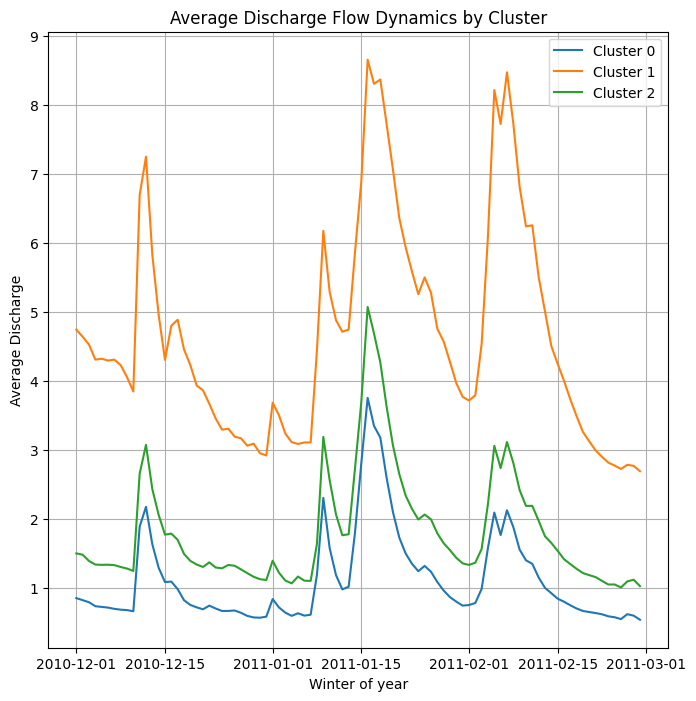

In [125]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [127]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2010-12-01  0.913098  1.507937  1.146489  0.555464  0.787141  0.860239   
2010-12-02  0.896074  1.466954  1.106759  0.544895  0.768500  0.843133   
2010-12-03  0.879049  1.425970  1.067030  0.541440  0.760018  0.835349   
2010-12-04  0.862024  1.384986  1.025252  0.528284  0.747608  0.823962   
2010-12-05  0.844999  1.344003  1.018602  0.534738  0.746356  0.822813   
...              ...       ...       ...       ...       ...       ...   
2011-02-24  0.705627  1.446732  0.989337  0.480136  0.799271  0.871370   
2011-02-25  0.697608  1.408564  0.914299  0.479592  0.793937  0.866475   
2011-02-26  1.138625  1.402647  1.695254  0.689335  1.189815  1.229740   
2011-02-27  1.210791  1.485427  2.149142  0.611153  1.369527  1.394648   
2011-02-28  0.865996  1.510866  1.532976  0.546804  0.977595  1.035003   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2010-12-01  0.791731  0.878882  0.864295  1.115632  ...  1.559564  0.756492   
2010-12-02  0.770812  0.860302  0.829180  1.028647  ...  1.390207  0.556311   
2010-12-03  0.768207  0.857988  0.805571  0.924666  ...  1.201874  0.722297   
2010-12-04  0.756766  0.847827  0.772621  0.835272  ...  1.121944  0.737141   
2010-12-05  0.775312  0.864299  0.763284  0.815065  ...  1.217119  0.767392   
...              ...       ...       ...       ...  ...       ...       ...   
2011-02-24  0.840469  0.922168  0.623565  0.637774  ...  0.506018  0.383244   
2011-02-25  0.832984  0.915520  0.622296  0.610303  ...  0.342427  0.318086   
2011-02-26  0.904086  0.978668  0.636026  0.498269  ...  0.314405  0.288787   
2011-02-27  0.911333  0.985105  0.638908  0.501625  ...  0.300501  0.301066   
2011-02-28  0.855424  0.935450  0.634174  0.449870  ...  0.267594  0.222945   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2010-12-01  3.873780  3.685697  3.027392  6.033036  0.770953  1.339898   
2010-12-02  3.579142  3.504194  2.582753  5.735200  0.756136  1.157691   
2010-12-03  3.236198  3.373158  2.895961  5.520176  0.759008  1.104889   
2010-12-04  3.150506  3.001403  2.758109  4.910148  0.697066  1.052234   
2010-12-05  3.243055  3.069882  2.576817  5.022519  0.651335  1.021452   
...              ...       ...       ...       ...       ...       ...   
2011-02-24  0.663597  0.766080  0.565391  0.853555  0.635785  0.764459   
2011-02-25  0.670798  0.727776  0.624061  0.720265  0.640090  0.769636   
2011-02-26  0.675639  0.712455  0.555153  0.689138  0.634274  0.840566   
2011-02-27  0.648517  0.702879  0.528973  0.669910  0.750672  0.926752   
2011-02-28  0.586463  0.663467  0.460872  0.682222  0.652744  0.854862   

             9000001   9000015  
2010-12-01  1.851065  1.775098  
2010-12-02  1.773026  1.703751  
2010-12-03  1.744842  1.677983  
2010-12-04  1.713514  1.649342  
2010-12-05  1.756503  1.688645  
...              ...       ...  
2011-02-24  1.508103  1.461544  
2011-02-25  1.491254  1.446140  
2011-02-26  1.740938  1.674414  
2011-02-27  2.023675  1.932908  
2011-02-28  1.696790  1.634052  

[90 rows x 252 columns]

<Axes: >

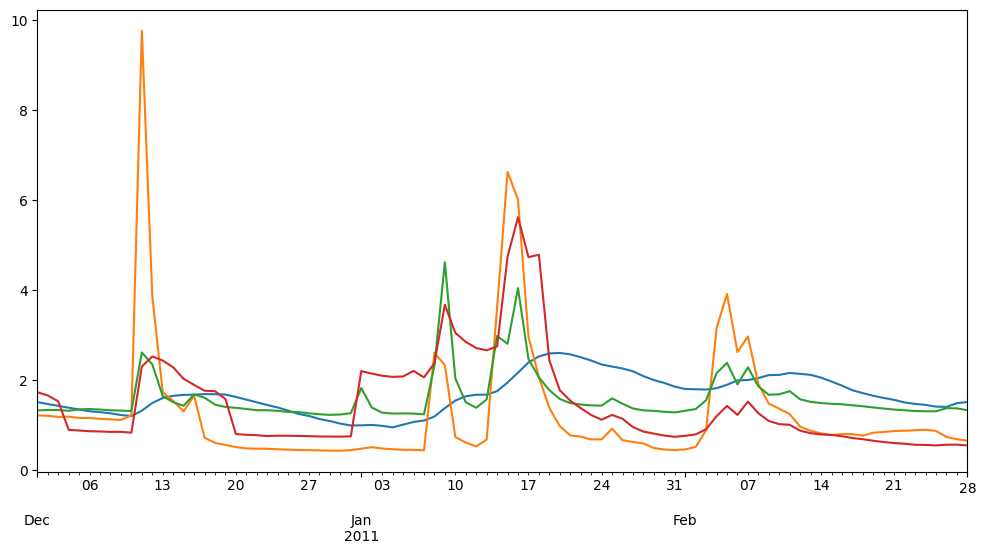

In [128]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

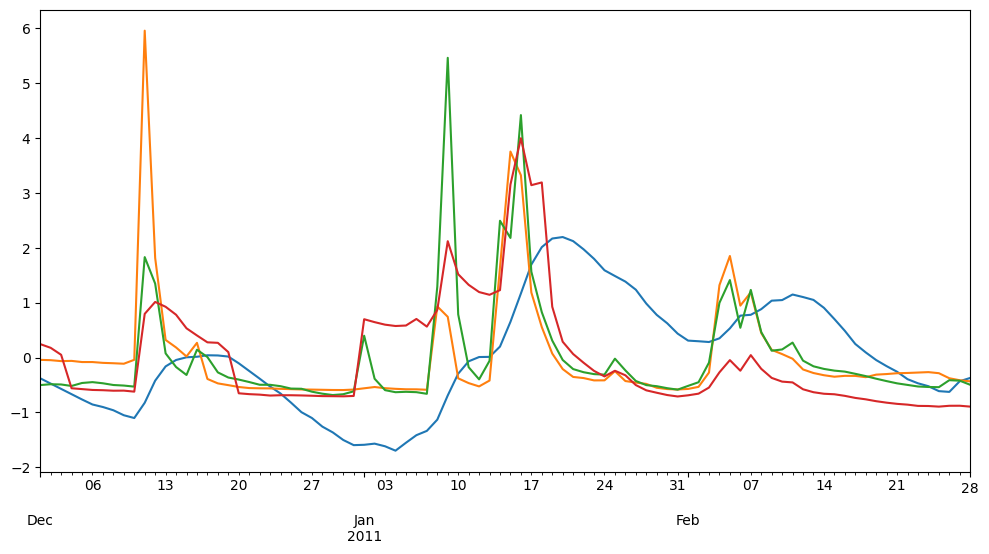

In [129]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

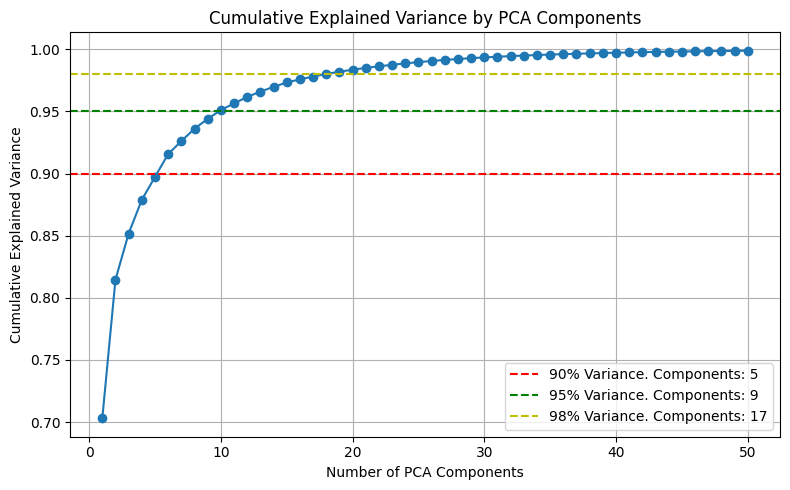

In [130]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -5.22420914,   1.64775102,  -3.20027781, ...,  -0.53536482,
         -0.66936852,  -0.3682477 ],
       [ -5.92823861,   1.02812419,  -3.11379891, ...,  -0.35387156,
         -0.91968664,   0.23844476],
       [ -6.717557  ,   0.71091394,  -2.9253006 , ...,  -0.15730702,
         -0.60792005,  -0.17696741],
       ...,
       [-11.15245816,  -3.50346896,   1.83461366, ...,  -1.31927353,
          0.09353774,   0.40048381],
       [-11.06764118,  -3.09182613,   1.55400001, ...,  -1.55605533,
          0.13936405,   0.23667659],
       [-12.30905377,  -2.34412732,   1.15824039, ...,  -0.80279881,
         -0.20589138,  -0.07691177]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


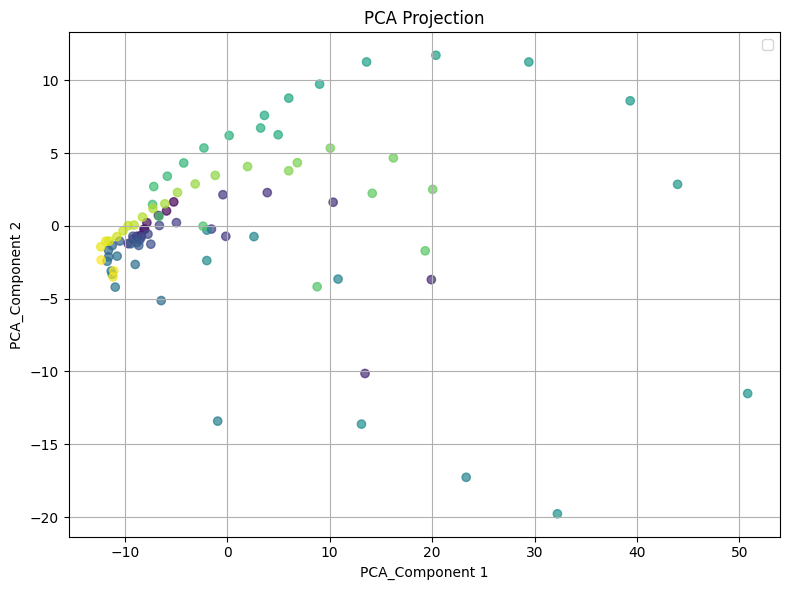

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_15408\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


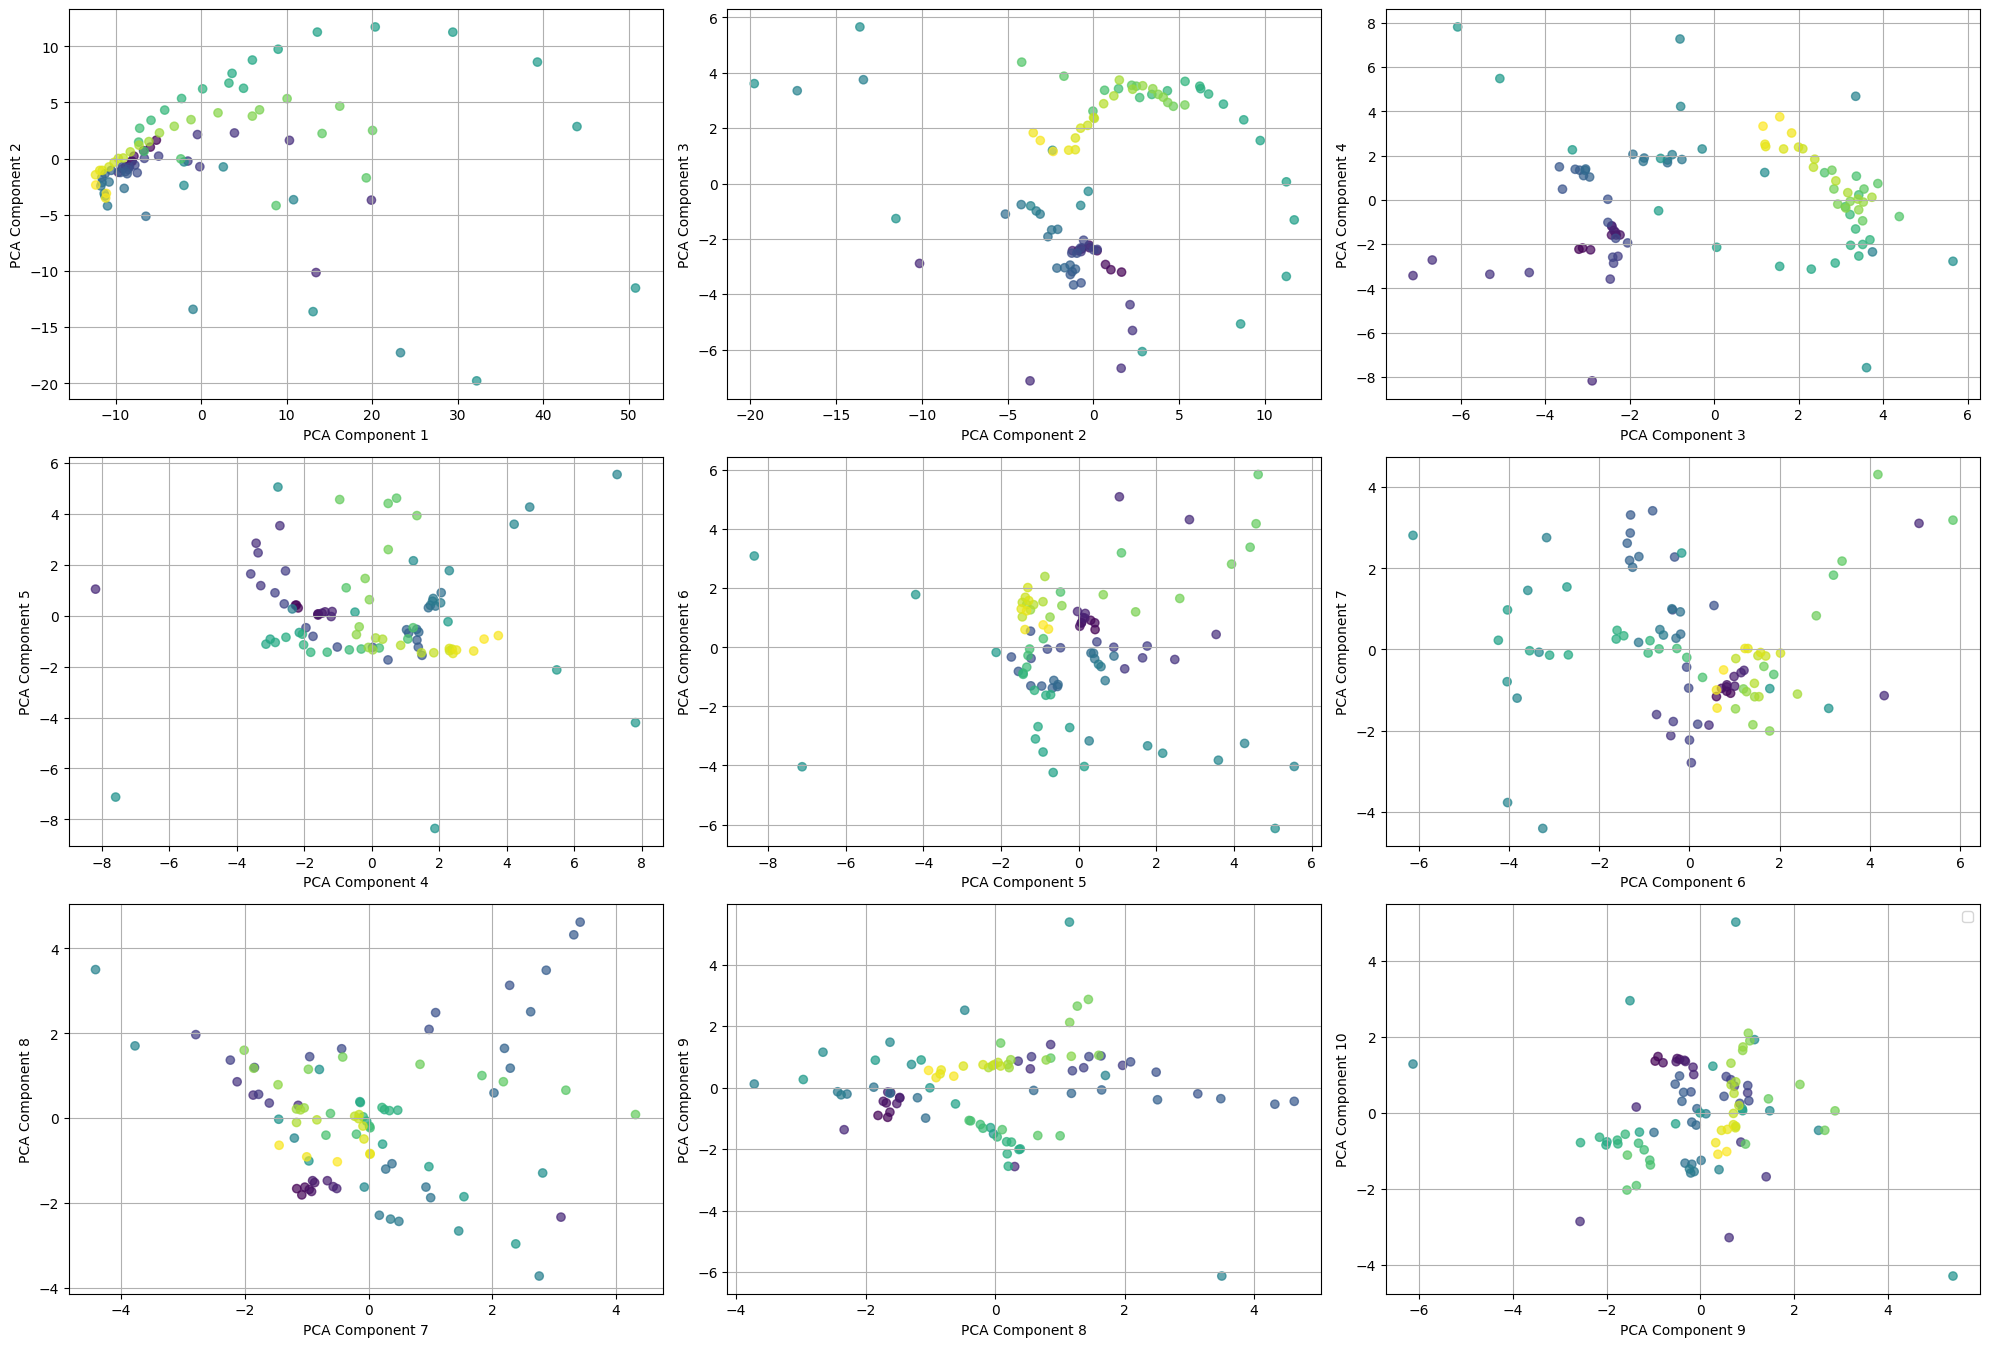

In [133]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [134]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.412
KMeans Davies-Bouldin Index is 1.101


<Axes: xlabel='k'>

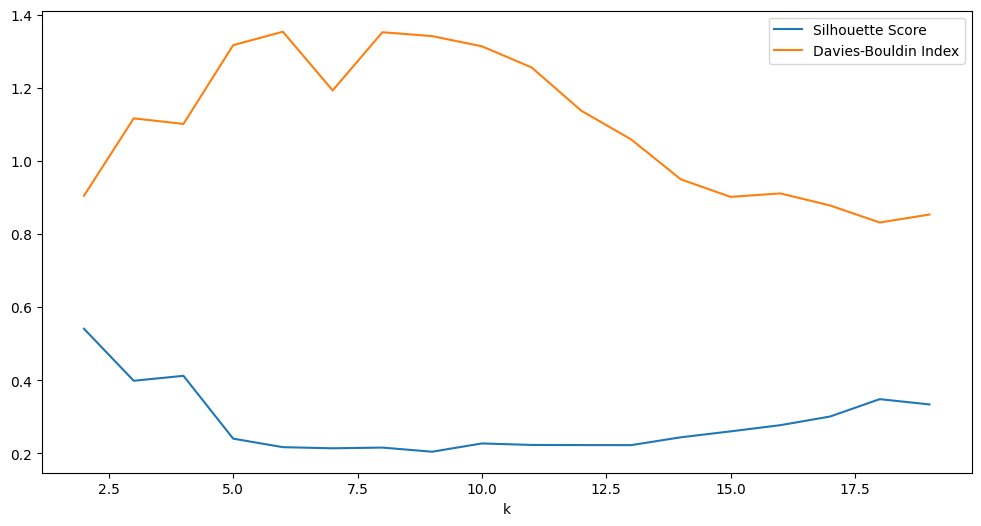

In [135]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         1     85               NaN   
2    1.01            3         2     80         -0.191451   
3    1.27            3         3     76         -0.164649   
4    1.52            3         4     69         -0.103801   
5    1.78            3         4     69         -0.103801   
6    2.03            3         4     60         -0.010752   
7    2.29            3         6     50          0.016004   
8    2.54            3         7     43          0.082425   
9    2.80            3         7     36          0.104919   
10   3.05            3         7     35          0.120684   
11   3.31            3         7     35          0.120684   
12   3.56            3         6     33          0.165757   
13   3.82            3         5     31          0.138848   
14   4.07            3         5     29          0.152794   
15   4.33            3         5     25          0.077375   
16   4.58            3         4     25          0.010896   
17   4.84            3         3     25          0.075020   
18   5.09            3         2     25          0.161246   
19   5.35            3         2     23          0.166096   
20   5.60            3         2     21          0.170877   
21   5.86            3         1     21               NaN   
22   6.11            3         2     18          0.120986   
23   6.37            3         2     18          0.120986   
24   6.62            3         2     18          0.120986   
25   6.88            3         2     16          0.092640   
26   7.13            3         2     16          0.092640   
27   7.39            3         2     14          0.066800   
28   7.64            3         2     13          0.051161   
29   7.90            3         2     12          0.035504   
30   8.15            3         2     12          0.035504   
31   8.41            3         2     12          0.035504   
32   8.66            3         2     12          0.035504   
33   8.92            3         2     12          0.035504   
34   9.17            3         1     12               NaN   
35   9.43            3         1     12               NaN   
36   9.68            3         1     12               NaN   
37   9.94            3         1     12               NaN   
38  10.19            3         1     11               NaN   
39  10.45            3         1     11               NaN   
40  10.70            3         1     11               NaN   
41  10.96            3         1      9               NaN   
42  11.21            3         1      9               NaN   
43  11.47            3         1      9               NaN   
44  11.72            3         1      9               NaN   
45  11.98            3         1      7               NaN   
46  12.23            3         1      7               NaN   
47  12.49            3         1      7               NaN   
48  12.74            3         1      7               NaN   
49  13.00            3         1      7               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.258883  
3               1.227699  
4               1.255859  
5               1.255859  
6               1.236322  
7               1.306237  
8               1.153190  
9               1.097493  
10              1.100209  
11              1.100209  
12              1.034043  
13              1.210790  
14              1.209151  
15              1.549072  
16              1.605895  
17              1.430433  
18              1.501112  
19              1.563894  
20              1.544057  
21                   NaN  
22              1.183002  
23              1.183002  
24              1.183002  
25              1.269555  
26              1.269555  
27              1.348038  
28              1.396428  
29              1.448166  
30              1.448166  
31              1.448166  
32 

<Axes: xlabel='eps'>

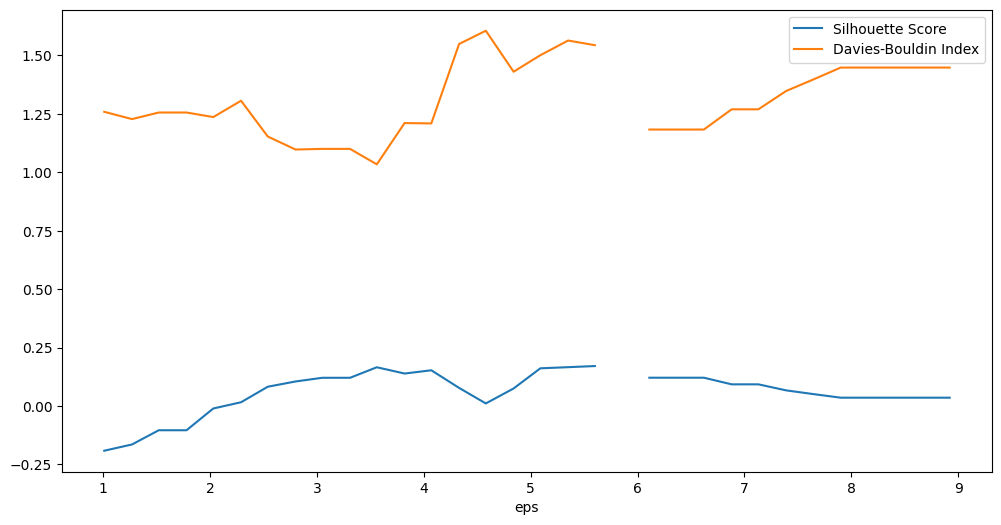

In [136]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

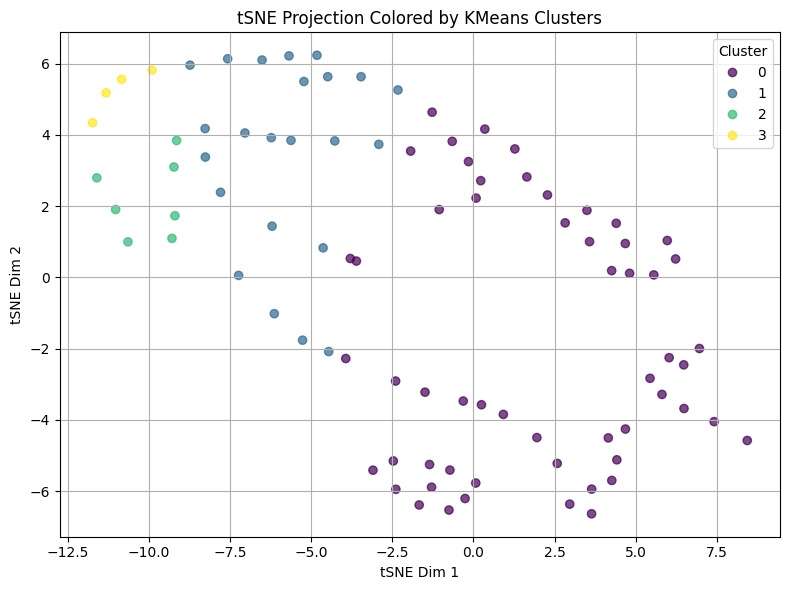

In [137]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         4    244          0.996354   
1    0.05            2         4    244          0.996354   
2    0.06            2         4    244          0.996354   
3    0.06            2         4    244          0.996354   
4    0.07            2         4    244          0.996354   
..    ...          ...       ...    ...               ...   
195  0.98            2        20    208          0.720625   
196  0.99            2        20    208          0.720625   
197  0.99            2        20    208          0.720625   
198  1.00            2        20    208          0.720625   
199  1.00            2        20    208          0.720625   

     Davies-Bouldin Index  
0                0.004231  
1                0.004231  
2                0.004231  
3                0.004231  
4                0.004231  
..                    ...  
195              0.317498  
196              0.317498  
197              0.317498  
198              0.317498  
199              0.317498  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

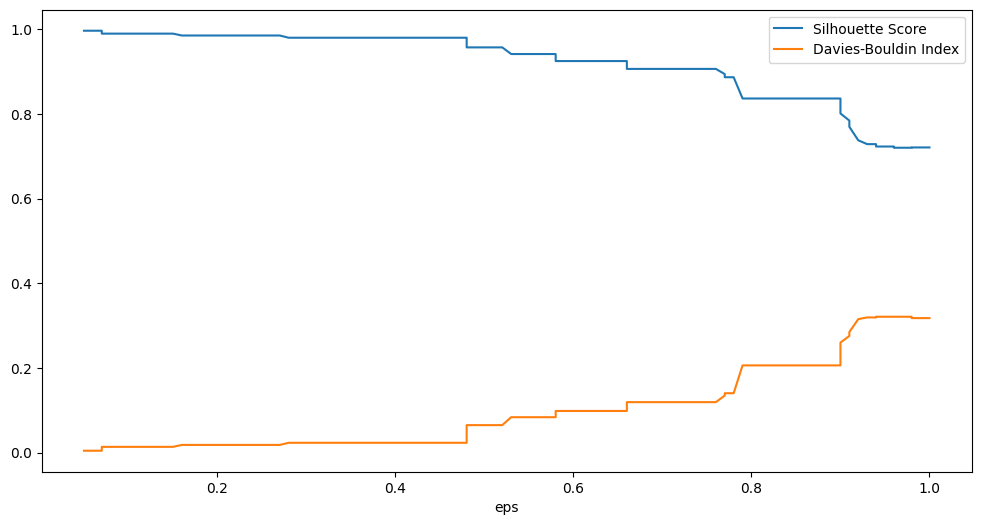

In [138]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))